<a href="https://colab.research.google.com/github/serggget-coder/-Automatic-leaf-infection-identifier111/blob/main/%D0%B4%D0%BB%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D1%8C%D0%B8_%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D1%8B%D0%B5_%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подгрузка папок с данными с гугл диска

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Создание функций на отображение статистических показателей rgb

*   Новый пункт
*   Новый пункт



In [ ]:
import cv2
import os
import numpy as np
from google.colab import drive

def apply_gray_world(image):
    """Реализация алгоритма 'серого мира' для коррекции цвета"""
    avg_b = np.mean(image[:,:,0])
    avg_g = np.mean(image[:,:,1])
    avg_r = np.mean(image[:,:,2])

    avg = (avg_b + avg_g + avg_r) / 3

    corrected = image.copy()
    corrected[:,:,0] = np.minimum(image[:,:,0] * (avg / avg_b), 255)
    corrected[:,:,1] = np.minimum(image[:,:,1] * (avg / avg_g), 255)
    corrected[:,:,2] = np.minimum(image[:,:,2] * (avg / avg_r), 255)

    return corrected.astype(np.uint8)

def process_image(image_path, output_folder):
    # Подключаем Google Drive
    drive.mount('/content/drive')

    # Создаем папку для результатов
    full_output_path = os.path.join('/content/drive/MyDrive', output_folder)
    os.makedirs(full_output_path, exist_ok=True)

    # Загружаем изображение
    original = cv2.imread(image_path)
    if original is None:
        print(f"Ошибка: Не удалось загрузить изображение {image_path}")
        return

    # 1. Уменьшаем яркость на 50
    darker = cv2.subtract(original, np.array([50.0]))

    # 2. Увеличиваем яркость на 100
    brighter = cv2.add(original, np.array([100.0]))

    # 3. Применяем серый мир ко всем вариантам
    gw_original = apply_gray_world(original)
    gw_darker = apply_gray_world(darker)
    gw_brighter = apply_gray_world(brighter)

    # Сохраняем все 6 изображений
    cv2.imwrite(os.path.join(full_output_path, '1_original.jpg'), original)
    cv2.imwrite(os.path.join(full_output_path, '2_darker.jpg'), darker)
    cv2.imwrite(os.path.join(full_output_path, '3_brighter.jpg'), brighter)
    cv2.imwrite(os.path.join(full_output_path, '4_gray_world_original.jpg'), gw_original)
    cv2.imwrite(os.path.join(full_output_path, '5_gray_world_darker.jpg'), gw_darker)
    cv2.imwrite(os.path.join(full_output_path, '6_gray_world_brighter.jpg'), gw_brighter)

    print(f"Обработка завершена. Результаты сохранены в {full_output_path}")

# Пример использования
input_image = '/content/drive/MyDrive/Original Data/train/Healthy02/00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG'  # Укажите ваш файл
output_directory = 'Papka'  # Папка в Google Drive

process_image(input_image, output_directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Обработка завершена. Результаты сохранены в /content/drive/MyDrive/Papka


In [ ]:
from tqdm import tqdm
import os
import numpy as np
from skimage import io, color
from PIL import Image
import math

def test_img_folder(folder_path):
    print(folder_path)
    if os.path.exists(folder_path):
        print("Путь существует")
    else:
        print("Путь не существует")
    count = 0

    arr_mean_r = []
    arr_std_r = []  # Было disp_r, теперь std_r (корень из дисперсии)
    arr_mean_g = []
    arr_std_g = []
    arr_mean_b = []
    arr_std_b = []

    with os.scandir(folder_path) as entries:
        for entry in tqdm(entries):
            if entry.is_file():
                count += 1
                image = io.imread(entry.path)
                data_r = image[:, :, 0].flatten()
                data_g = image[:, :, 1].flatten()
                data_b = image[:, :, 2].flatten()

                mean_r = np.mean(data_r)
                std_r = math.sqrt(np.var(data_r))  # Корень из дисперсии

                mean_g = np.mean(data_g)
                std_g = math.sqrt(np.var(data_g))

                mean_b = np.mean(data_b)
                std_b = math.sqrt(np.var(data_b))

                arr_mean_r.append(mean_r)
                arr_mean_g.append(mean_g)
                arr_mean_b.append(mean_b)
                arr_std_r.append(std_r)
                arr_std_g.append(std_g)
                arr_std_b.append(std_b)

    result = {
        "folder_path": folder_path,
        "num_files": count,
        "arr_mean_r": arr_mean_r,
        "arr_mean_g": arr_mean_g,
        "arr_mean_b": arr_mean_b,
        "arr_std_r": arr_std_r,  # Было arr_disp_r
        "arr_std_g": arr_std_g,
        "arr_std_b": arr_std_b,
        "m_r": np.mean(arr_mean_r),
        "m_g": np.mean(arr_mean_g),
        "m_b": np.mean(arr_mean_b),
        "std_r": np.mean(arr_std_r),  # Было d_r
        "std_g": np.mean(arr_std_g),
        "std_b": np.mean(arr_std_b)
    }

    return result

def test_img_folder_rgb(tag="tag", folder_path=""):
    print(folder_path)
    if os.path.exists(folder_path):
        print("Путь существует")
    else:
        print("Путь не существует")
    count = 0

    arr_mean_r = []
    arr_std_r = []
    arr_mean_g = []
    arr_std_g = []
    arr_mean_b = []
    arr_std_b = []
    arr_mean_grey = []
    arr_std_grey = []

    with os.scandir(folder_path) as entries:
        for entry in tqdm(entries):
            if entry.is_file():
                count += 1
                image = io.imread(entry.path)
                data_r = image[:, :, 0].flatten()
                data_g = image[:, :, 1].flatten()
                data_b = image[:, :, 2].flatten()

                mean_r = np.mean(data_r)
                std_r = math.sqrt(np.var(data_r))

                mean_g = np.mean(data_g)
                std_g = math.sqrt(np.var(data_g))

                mean_b = np.mean(data_b)
                std_b = math.sqrt(np.var(data_b))

                arr_mean_r.append(mean_r)
                arr_mean_g.append(mean_g)
                arr_mean_b.append(mean_b)
                arr_std_r.append(std_r)
                arr_std_g.append(std_g)
                arr_std_b.append(std_b)

                gray_image = color.rgb2gray(image)
                mean_gray = np.mean(gray_image)
                std_gray = math.sqrt(np.var(gray_image))

                arr_mean_grey.append(mean_gray)
                arr_std_grey.append(std_gray)

    result = {
        "tag": tag,
        "folder_path": folder_path,
        "num_files": count,
        "arr_mean_r": arr_mean_r,
        "arr_mean_g": arr_mean_g,
        "arr_mean_b": arr_mean_b,
        "arr_std_r": arr_std_r,
        "arr_std_g": arr_std_g,
        "arr_std_b": arr_std_b,
        "arr_mean_gray": arr_mean_grey,
        "arr_std_gray": arr_std_grey,
        "m_r": np.mean(arr_mean_r),
        "m_g": np.mean(arr_mean_g),
        "m_b": np.mean(arr_mean_b),
        "std_r": np.mean(arr_std_r),
        "std_g": np.mean(arr_std_g),
        "std_b": np.mean(arr_std_b),
        "m_gray": np.mean(arr_mean_grey),
        "std_gray": np.mean(arr_std_grey)
    }

    return result

def print_result_rgb_grey(result):
    print(f"|{result['tag']:>10}|{result['m_r']:>10.2f}|{result['std_r']:>10.2f}|"
          f"{result['m_g']:>10.2f}|{result['std_g']:>10.2f}|"
          f"{result['m_b']:>10.2f}|{result['std_b']:>10.2f}|"
          f"{result['m_gray']:>10.2f}|{result['std_gray']:>10.2f}|"
          f"{result['num_files']:>10}|")

Создание функций на отображение статистических показателей yuv

In [ ]:
def test_img_folder_yuv(tag="tag", folder_path=""):
    print(folder_path)
    if os.path.exists(folder_path):
        print("Путь существует")
    else:
        print("Путь не существует")
    count = 0

    arr_mean_y = []
    arr_std_y = []
    arr_mean_u = []
    arr_std_u = []
    arr_mean_v = []
    arr_std_v = []

    with os.scandir(folder_path) as entries:
        for entry in tqdm(entries):
            if entry.is_file():
                count += 1
                # Читаем изображение и конвертируем в YUV
                image = io.imread(entry.path)
                yuv_image = color.rgb2yuv(image)

                # Масштабируем каналы U и V из [-0.5, 0.5] в [0, 255] для удобства анализа
                yuv_image[:, :, 1] = (yuv_image[:, :, 1] + 0.5) * 255
                yuv_image[:, :, 2] = (yuv_image[:, :, 2] + 0.5) * 255

                # Получаем данные каналов
                data_y = yuv_image[:, :, 0].flatten()
                data_u = yuv_image[:, :, 1].flatten()
                data_v = yuv_image[:, :, 2].flatten()

                # Вычисляем статистики
                mean_y = np.mean(data_y)
                std_y = math.sqrt(np.var(data_y))

                mean_u = np.mean(data_u)
                std_u = math.sqrt(np.var(data_u))

                mean_v = np.mean(data_v)
                std_v = math.sqrt(np.var(data_v))

                # Сохраняем результаты
                arr_mean_y.append(mean_y)
                arr_mean_u.append(mean_u)
                arr_mean_v.append(mean_v)
                arr_std_y.append(std_y)
                arr_std_u.append(std_u)
                arr_std_v.append(std_v)

    result = {
        "tag": tag,
        "folder_path": folder_path,
        "num_files": count,
        "arr_mean_y": arr_mean_y,
        "arr_mean_u": arr_mean_u,
        "arr_mean_v": arr_mean_v,
        "arr_std_y": arr_std_y,
        "arr_std_u": arr_std_u,
        "arr_std_v": arr_std_v,
        "m_y": np.mean(arr_mean_y),
        "m_u": np.mean(arr_mean_u),
        "m_v": np.mean(arr_mean_v),
        "std_y": np.mean(arr_std_y),
        "std_u": np.mean(arr_std_u),
        "std_v": np.mean(arr_std_v)
    }

    return result

def print_result_yuv(result):
    print(f"|{result['tag']:>10}|{result['m_y']:>10.2f}|{result['std_y']:>10.2f}|"
          f"{result['m_u']:>10.2f}|{result['std_u']:>10.2f}|"
          f"{result['m_v']:>10.2f}|{result['std_v']:>10.2f}|"
          f"{result['num_files']:>10}|")

Создание функций на отображение статистических показателей hsv

In [ ]:
import os
import numpy as np
from skimage import io, color
from PIL import Image
import math
from tqdm import tqdm

def test_img_folder_hsv(tag="tag", folder_path=""):
    print(folder_path)
    if os.path.exists(folder_path):
        print("Путь существует")
    else:
        print("Путь не существует")
    count = 0

    arr_mean_h = []
    arr_std_h = []
    arr_mean_s = []
    arr_std_s = []
    arr_mean_v = []
    arr_std_v = []

    with os.scandir(folder_path) as entries:
        for entry in tqdm(entries):
            if entry.is_file():
                count += 1
                image = io.imread(entry.path)
                image_hsv = color.rgb2hsv(image)

                data_h = image_hsv[:, :, 0].flatten()
                data_s = image_hsv[:, :, 1].flatten()
                data_v = image_hsv[:, :, 2].flatten()

                mean_h = np.mean(data_h)
                std_h = math.sqrt(np.var(data_h))

                mean_s = np.mean(data_s)
                std_s = math.sqrt(np.var(data_s))

                mean_v = np.mean(data_v)
                std_v = math.sqrt(np.var(data_v))

                arr_mean_h.append(mean_h)
                arr_mean_s.append(mean_s)
                arr_mean_v.append(mean_v)
                arr_std_h.append(std_h)
                arr_std_s.append(std_s)
                arr_std_v.append(std_v)

    result = {
        "tag": tag,
        "folder_path": folder_path,
        "num_files": count,
        "arr_mean_h": arr_mean_h,
        "arr_mean_s": arr_mean_s,
        "arr_mean_v": arr_mean_v,
        "arr_std_h": arr_std_h,
        "arr_std_s": arr_std_s,
        "arr_std_v": arr_std_v,
        "m_h": np.mean(arr_mean_h),
        "m_s": np.mean(arr_mean_s),
        "m_v": np.mean(arr_mean_v),
        "std_h": np.mean(arr_std_h),
        "std_s": np.mean(arr_std_s),
        "std_v": np.mean(arr_std_v)
    }

    return result

def print_result_hsv(result):
    print(f"|{result['tag']:>10}|{result['m_h']:>10.2f}|{result['std_h']:>10.2f}|"
          f"{result['m_s']:>10.2f}|{result['std_s']:>10.2f}|"
          f"{result['m_v']:>10.2f}|{result['std_v']:>10.2f}|"
          f"{result['num_files']:>10}|")


Создание функций на отображение статистических показателей lab

In [ ]:
def test_img_folder_lab(tag="tag", folder_path=""):
    print(folder_path)
    if os.path.exists(folder_path):
        print("Путь существует")
    else:
        print("Путь не существует")
    count = 0

    arr_mean_l = []
    arr_std_l = []  # Стандартное отклонение вместо дисперсии
    arr_mean_a = []
    arr_std_a = []
    arr_mean_b = []
    arr_std_b = []

    with os.scandir(folder_path) as entries:
        for entry in tqdm(entries):
            if entry.is_file():
                count += 1
                image = io.imread(entry.path)

                # Конвертируем в LAB цветовое пространство
                lab_image = color.rgb2lab(image)

                # Получаем каналы
                data_l = lab_image[:, :, 0].flatten()
                data_a = lab_image[:, :, 1].flatten()
                data_b = lab_image[:, :, 2].flatten()

                # Вычисляем средние и стандартные отклонения
                mean_l = np.mean(data_l)
                std_l = math.sqrt(np.var(data_l))

                mean_a = np.mean(data_a)
                std_a = math.sqrt(np.var(data_a))

                mean_b = np.mean(data_b)
                std_b = math.sqrt(np.var(data_b))

                # Сохраняем результаты
                arr_mean_l.append(mean_l)
                arr_mean_a.append(mean_a)
                arr_mean_b.append(mean_b)
                arr_std_l.append(std_l)
                arr_std_a.append(std_a)
                arr_std_b.append(std_b)

    result = {
        "tag": tag,
        "folder_path": folder_path,
        "num_files": count,
        "arr_mean_l": arr_mean_l,
        "arr_mean_a": arr_mean_a,
        "arr_mean_b": arr_mean_b,
        "arr_std_l": arr_std_l,
        "arr_std_a": arr_std_a,
        "arr_std_b": arr_std_b,
        "m_l": np.mean(arr_mean_l),
        "m_a": np.mean(arr_mean_a),
        "m_b": np.mean(arr_mean_b),
        "std_l": np.mean(arr_std_l),
        "std_a": np.mean(arr_std_a),
        "std_b": np.mean(arr_std_b)
    }

    return result

def print_result_lab(result):
    print(f"|{result['tag']:>10}|{result['m_l']:>10.2f}|{result['std_l']:>10.2f}|"
          f"{result['m_a']:>10.2f}|{result['std_a']:>10.2f}|"
          f"{result['m_b']:>10.2f}|{result['std_b']:>10.2f}|"
          f"{result['num_files']:>10}|")

Перевод исходных изображений в цветовую коррекцию "Серый мир"

На вход исходные изображения, на выход изображения в "Сером мире"


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm  # для прогресс-бара (опционально)

# Пути к исходным и выходным данным
input_paths = {
    "BlackRot": "/content/drive/MyDrive/Original Data/train/Black Rot02",
    "ESCA": "/content/drive/MyDrive/Original Data/train/ESCA02",
    "Healthy": "/content/drive/MyDrive/Original Data/train/Healthy02",
    "LeafBlight": "/content/drive/MyDrive/Original Data/train/Leaf Blight02",
}

output_base = "/content/drive/MyDrive/Original Data/train_corrected"
os.makedirs(output_base, exist_ok=True)

# Функция коррекции "Серый мир"
def gray_world(image):
    mean_b = np.mean(image[:, :, 0])
    mean_g = np.mean(image[:, :, 1])
    mean_r = np.mean(image[:, :, 2])
    mean_gray = (mean_b + mean_g + mean_r) / 3.0

    scale_b = mean_gray / (mean_b + 1e-6)  # +1e-6 чтобы избежать деления на 0
    scale_g = mean_gray / (mean_g + 1e-6)
    scale_r = mean_gray / (mean_r + 1e-6)

    corrected = image.copy().astype(np.float32)
    corrected[:, :, 0] = np.clip(corrected[:, :, 0] * scale_b, 0, 255)
    corrected[:, :, 1] = np.clip(corrected[:, :, 1] * scale_g, 0, 255)
    corrected[:, :, 2] = np.clip(corrected[:, :, 2] * scale_r, 0, 255)

    return corrected.astype(np.uint8)

# Обработка всех изображений
for class_name, input_path in input_paths.items():
    output_path = os.path.join(output_base, f"{class_name}_corrected")
    os.makedirs(output_path, exist_ok=True)

    print(f"Обработка: {class_name}...")
    for filename in tqdm(os.listdir(input_path)):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_path, filename)
            img = cv2.imread(img_path)

            if img is not None:
                corrected_img = gray_world(img)
                cv2.imwrite(os.path.join(output_path, filename), corrected_img)

print("Готово! Результаты сохранены в:", output_base)

Обработка: BlackRot...


100%|██████████| 1888/1888 [01:00<00:00, 31.02it/s]


Обработка: ESCA...


100%|██████████| 1920/1920 [01:21<00:00, 23.49it/s]


Обработка: Healthy...


100%|██████████| 1692/1692 [01:18<00:00, 21.49it/s]


Обработка: LeafBlight...


100%|██████████| 1722/1722 [01:29<00:00, 19.22it/s]

Готово! Результаты сохранены в: /content/drive/MyDrive/Original Data/train_corrected


Перевод изображений в "Сером мире" через следующие фильтры: сглаживание, дифференцирование пространственное  и контрастирование изобрображений

На вход изображения в сером мире, на выход 3 папки, где изображения пропущены через каждый фильтр




In [ ]:
import cv2
import os
from tqdm import tqdm

# Пути к папкам с изображениями
paths = [
    "/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected",
    "/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected",
    "/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected",
    "/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected"
]

# Параметры обработки
blur_kernel = (5, 5)  # Размер ядра для фильтра усреднения
alpha = 1.5           # Коэффициент контрастности
beta = 50             # Сдвиг яркости

def process_images(input_path):
    # Создаем подпапки для результатов
    base_name = os.path.basename(input_path)
    output_path_blur = os.path.join("/content/drive/MyDrive/Processed Data", f"{base_name}_blur")
    output_path_sobel = os.path.join("/content/drive/MyDrive/Processed Data", f"{base_name}_sobel")
    output_path_contrast = os.path.join("/content/drive/MyDrive/Processed Data", f"{base_name}_contrast")

    os.makedirs(output_path_blur, exist_ok=True)
    os.makedirs(output_path_sobel, exist_ok=True)
    os.makedirs(output_path_contrast, exist_ok=True)

    # Обрабатываем все изображения в папке
    for filename in tqdm(os.listdir(input_path)):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_path, filename)

            try:
                # Чтение изображения
                image = cv2.imread(img_path)

                # 1. Применение фильтра усреднения
                blurred = cv2.blur(image, blur_kernel)
                cv2.imwrite(os.path.join(output_path_blur, filename), blurred)

                # 2. Применение фильтра Собеля (в градациях серого)
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
                sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
                sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
                cv2.imwrite(os.path.join(output_path_sobel, filename), sobel_combined)

                # 3. Изменение контрастности и яркости
                contrasted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
                cv2.imwrite(os.path.join(output_path_contrast, filename), contrasted)

            except Exception as e:
                print(f"Ошибка при обработке {filename}: {str(e)}")

# Обрабатываем все указанные папки
for path in paths:
    print(f"Обработка папки: {path}")
    process_images(path)

print("Обработка всех изображений завершена!")

Обработка папки: /content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected


100%|██████████| 1888/1888 [01:14<00:00, 25.23it/s]


Обработка папки: /content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected


100%|██████████| 1920/1920 [01:23<00:00, 23.12it/s]


Обработка папки: /content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected


100%|██████████| 1692/1692 [01:05<00:00, 25.68it/s]


Обработка папки: /content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected


100%|██████████| 1722/1722 [01:08<00:00, 25.31it/s]

Обработка всех изображений завершена!


Подготовка расчета статистических показателей по разным цветовым моделям

In [ ]:
from tqdm import tqdm
import os
import numpy as np
from skimage import io
from tabulate import tabulate

headers = ["Mean R", "Disp R", "Mean G", "Disp G", "Mean B", "Disp B", "Mean GR", "Disp GR", "Files"]
headers1 = ["Tag","Mean R", "Disp R", "Mean G", "Disp G", "Mean B", "Disp B", "Mean GR", "Disp GR", "Files"]
headers_yuv = ["Tag","Mean Y", "Disp Y", "Mean U", "Disp U", "Mean V", "Disp V", "Files"]
headers_hsv = ["Tag","Mean H", "Disp H", "Mean S", "Disp S", "Mean V", "Disp V", "Files"]
headers_lab = ["Tag","Mean L", "Disp L", "Mean a", "Disp a", "Mean b", "Disp b", "Files"]

folder_paths = {
"BlackRot":"/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected",
"ESCA":"/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected",
"Healthy":"/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected",
"LeafBlight":"/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected"
}

Расчет статистических показателей rgb в Сером мире

In [ ]:
result_Healthy=test_img_folder_rgb(tag="Healthy",folder_path=folder_paths["Healthy"])
result_BlackRot=test_img_folder_rgb(tag="BlackRot",folder_path=folder_paths["BlackRot"])
result_ESCA=test_img_folder_rgb(tag="ESCA",folder_path=folder_paths["ESCA"])
result_LeafBlight=test_img_folder_rgb(tag="LeafBlight",folder_path=folder_paths["LeafBlight"])

print("".join(f"|{h:<{10}}" for h in headers1))


print_result_rgb_grey(result_Healthy)

print_result_rgb_grey(result_BlackRot)

print_result_rgb_grey(result_ESCA)

print_result_rgb_grey(result_LeafBlight)



/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected
Путь существует


1692it [00:35, 47.09it/s] 


/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected
Путь существует


1888it [00:36, 51.55it/s] 


/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected
Путь существует


1920it [00:37, 51.37it/s] 


/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected
Путь существует


1722it [00:33, 52.16it/s] 

|Tag       |Mean R    |Disp R    |Mean G    |Disp G    |Mean B    |Disp B    |Mean GR   |Disp GR   |Files     
|   Healthy|    100.54|     22.12|    100.55|     18.95|    100.53|     26.25|      0.39|      0.08|      1692|
|  BlackRot|     76.39|     29.57|     76.41|     24.14|     76.39|     39.16|      0.30|      0.10|      1888|
|      ESCA|     74.86|     38.69|     74.88|     31.60|     74.75|     46.22|      0.29|      0.13|      1920|
|LeafBlight|     94.35|     29.45|     94.37|     28.48|     94.27|     42.18|      0.37|      0.11|      1722|


Расчет статистических показателей yuv в Сером мире

In [ ]:
result_Healthy=test_img_folder_yuv(tag="Healthy",folder_path=folder_paths["Healthy"])
result_BlackRot=test_img_folder_yuv(tag="BlackRot",folder_path=folder_paths["BlackRot"])
result_ESCA=test_img_folder_yuv(tag="ESCA",folder_path=folder_paths["ESCA"])
result_LeafBlight=test_img_folder_yuv(tag="LeafBlight",folder_path=folder_paths["LeafBlight"])

print("".join(f"|{h:<{10}}" for h in headers_yuv))
print_result_yuv(result_Healthy)
print_result_yuv(result_BlackRot)
print_result_yuv(result_ESCA)
print_result_yuv(result_LeafBlight)




/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected
Путь существует


1692it [00:22, 74.90it/s] 


/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected
Путь существует


1888it [00:28, 66.37it/s] 


/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected
Путь существует


1920it [00:11, 170.78it/s]


/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected
Путь существует


1722it [00:10, 163.19it/s]

|Tag       |Mean Y    |Disp Y    |Mean U    |Disp U    |Mean V    |Disp V    |Files     
|   Healthy|      0.39|      0.08|    127.49|      4.34|    127.49|      2.95|      1692|
|  BlackRot|      0.30|      0.10|    127.49|      8.00|    127.49|      6.67|      1888|
|      ESCA|      0.29|      0.13|    127.45|      8.11|    127.50|      9.75|      1920|
|LeafBlight|      0.37|      0.12|    127.46|      9.32|    127.50|      4.31|      1722|


Расчет статистических показателей hsv в Сером мире

In [ ]:
result_Healthy=test_img_folder_hsv(tag="Healthy",folder_path=folder_paths["Healthy"])
result_BlackRot=test_img_folder_hsv(tag="BlackRot",folder_path=folder_paths["BlackRot"])
result_ESCA=test_img_folder_hsv(tag="ESCA",folder_path=folder_paths["ESCA"])
result_LeafBlight=test_img_folder_hsv(tag="LeafBlight",folder_path=folder_paths["LeafBlight"])

print("".join(f"|{h:<{10}}" for h in headers_hsv))
print_result_hsv(result_Healthy)
print_result_hsv(result_BlackRot)
print_result_hsv(result_ESCA)
print_result_hsv(result_LeafBlight)




/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected
Путь существует


1692it [00:26, 63.30it/s] 


/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected
Путь существует


1888it [00:28, 65.46it/s] 


/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected
Путь существует


1920it [00:30, 63.32it/s] 


/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected
Путь существует


1722it [00:26, 65.00it/s] 

|Tag       |Mean H    |Disp H    |Mean S    |Disp S    |Mean V    |Disp V    |Files     
|   Healthy|      0.48|      0.26|      0.10|      0.08|      0.41|      0.09|      1692|
|  BlackRot|      0.46|      0.25|      0.25|      0.16|      0.34|      0.13|      1888|
|      ESCA|      0.46|      0.25|      0.29|      0.18|      0.34|      0.16|      1920|
|LeafBlight|      0.44|      0.26|      0.22|      0.16|      0.41|      0.14|      1722|


Расчет статистических показателей lab в Сером мире

In [ ]:
result_Healthy=test_img_folder_lab(tag="Healthy",folder_path=folder_paths["Healthy"])
result_BlackRot=test_img_folder_lab(tag="BlackRot",folder_path=folder_paths["BlackRot"])
result_ESCA=test_img_folder_lab(tag="ESCA",folder_path=folder_paths["ESCA"])
result_LeafBlight=test_img_folder_lab(tag="LeafBlight",folder_path=folder_paths["LeafBlight"])

print("".join(f"|{h:<{10}}" for h in headers_lab))
print_result_lab(result_Healthy)
print_result_lab(result_BlackRot)
print_result_lab(result_ESCA)
print_result_lab(result_LeafBlight)




/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected
Путь существует


1692it [00:32, 51.64it/s] 


/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected
Путь существует


1888it [00:29, 63.48it/s] 


/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected
Путь существует


1920it [00:30, 63.80it/s] 


/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected
Путь существует


1722it [00:25, 66.45it/s] 

|Tag       |Mean L    |Disp L    |Mean a    |Disp a    |Mean b    |Disp b    |Files     
|   Healthy|     42.43|      8.18|     -0.01|      4.41|      0.16|      5.86|      1692|
|  BlackRot|     32.26|     10.95|      0.12|      8.56|      0.52|     10.81|      1888|
|      ESCA|     31.51|     14.04|      0.06|     10.38|      0.78|     10.88|      1920|
|LeafBlight|     39.75|     12.21|      0.33|      6.59|      0.41|     12.14|      1722|


Визуализация расчитанных показателей с помощью диаграмм (Серый мир)

/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected
Путь существует


1692it [00:18, 91.36it/s] 


/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected
Путь существует


1888it [00:20, 90.89it/s] 


/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected
Путь существует


1920it [00:20, 92.37it/s] 


/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected
Путь существует


1722it [00:18, 92.60it/s] 


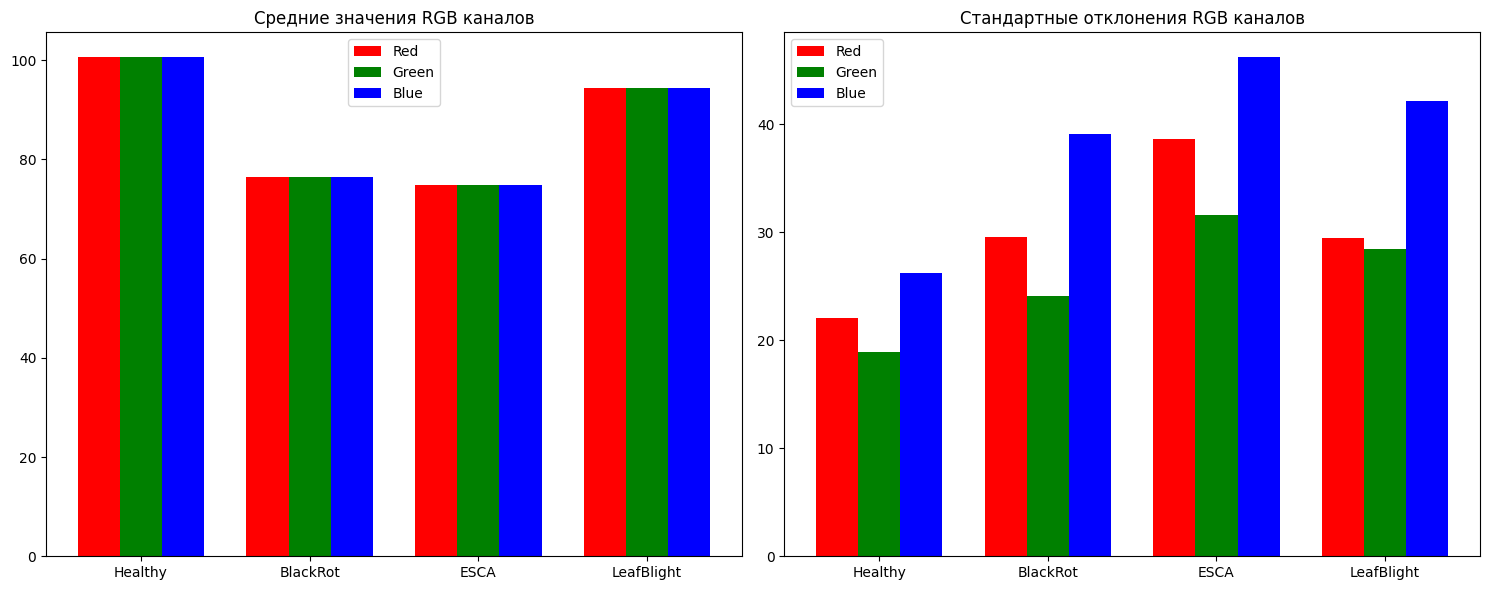

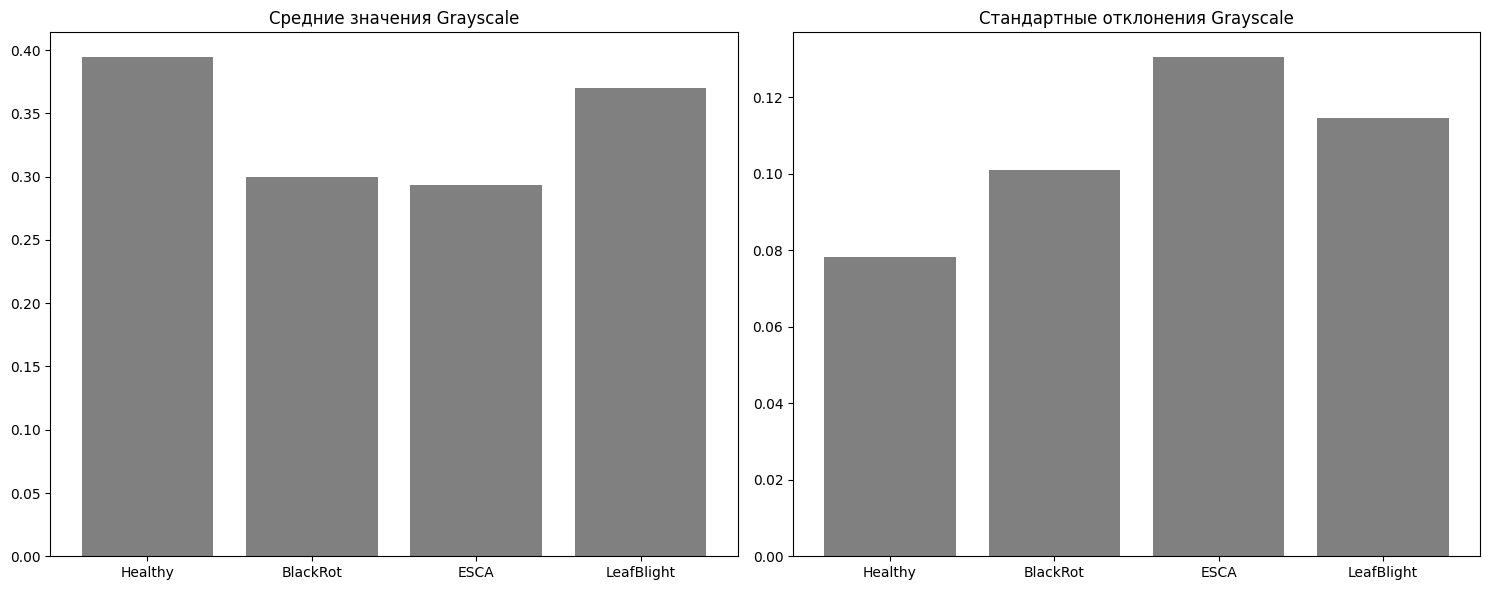

/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected
Путь существует


1692it [00:13, 126.09it/s]


/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected
Путь существует


1888it [00:14, 134.09it/s]


/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected
Путь существует


1920it [00:14, 132.12it/s]


/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected
Путь существует


1722it [00:13, 131.65it/s]


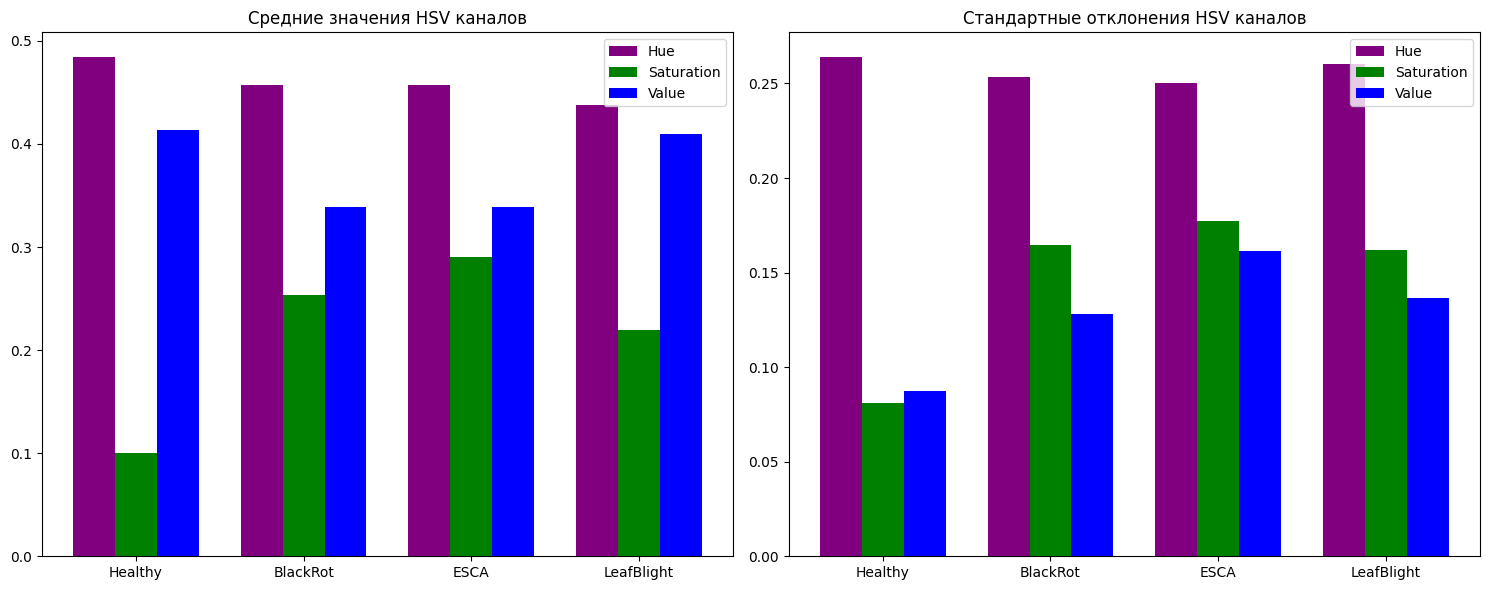

/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected
Путь существует


1692it [00:17, 96.53it/s] 


/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected
Путь существует


1888it [00:21, 89.30it/s] 


/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected
Путь существует


1920it [00:21, 90.54it/s] 


/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected
Путь существует


1722it [00:19, 86.68it/s] 


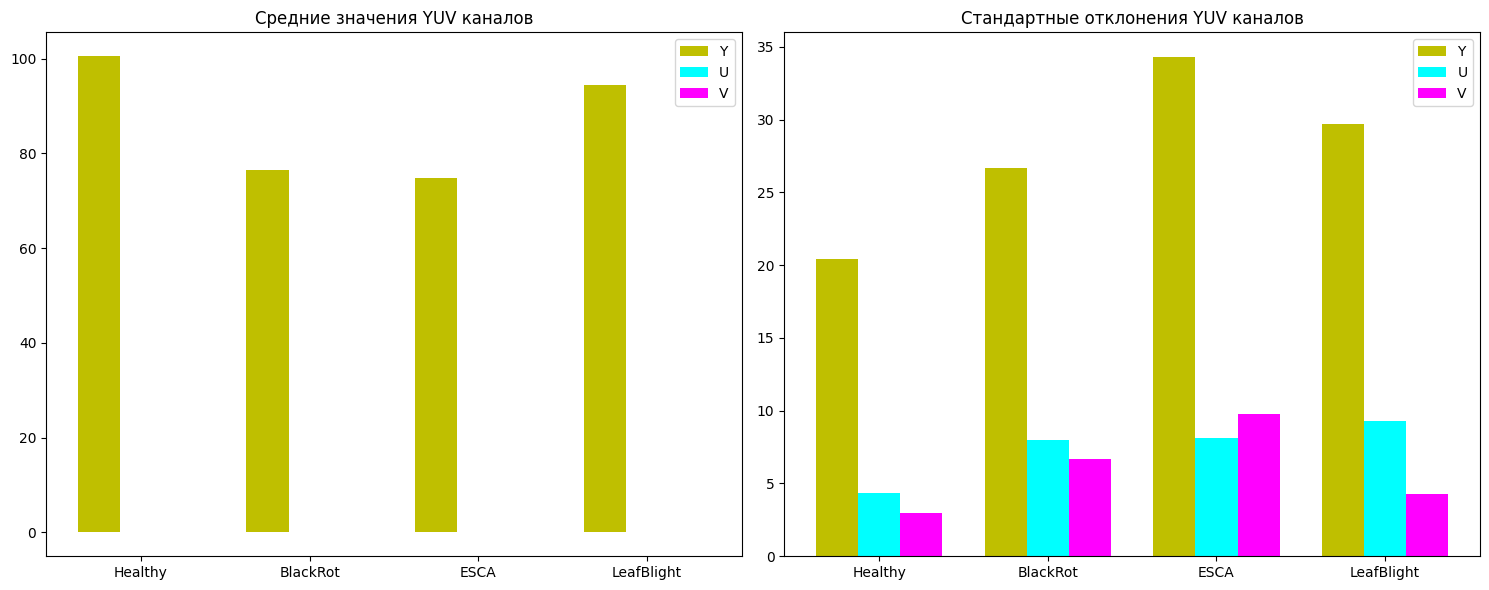

/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected
Путь существует


1692it [00:13, 129.62it/s]


/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected
Путь существует


1888it [00:16, 117.92it/s]


/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected
Путь существует


1920it [00:14, 131.51it/s]


/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected
Путь существует


1722it [00:12, 132.79it/s]


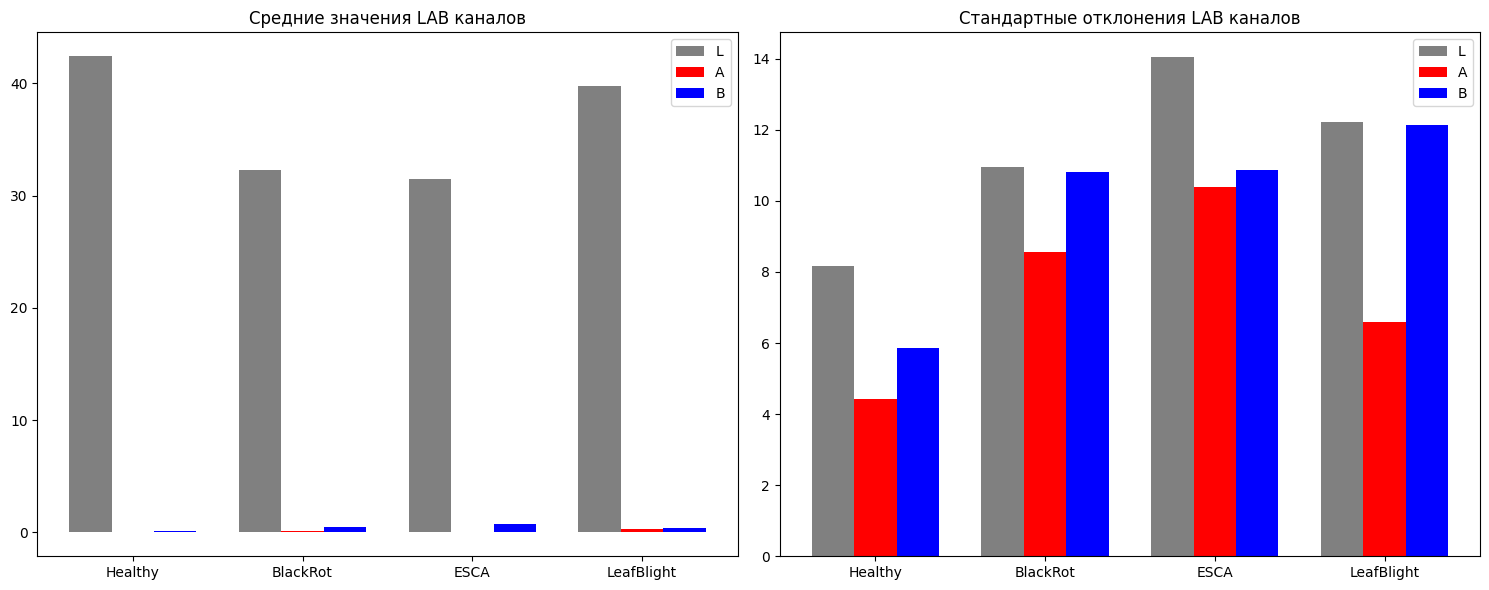

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_color_features(results, space='rgb'):
    """
    Построение диаграмм цветовых признаков
    :param results: список результатов (dict) от функций test_img_folder_*
    :param space: цветовое пространство ('rgb', 'gray', 'yuv', 'hsv', 'lab')
    """
    tags = [res['tag'] for res in results]

    if space == 'rgb':
        # RGB диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_r = [res['m_r'] for res in results]
        means_g = [res['m_g'] for res in results]
        means_b = [res['m_b'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_r, width, label='Red', color='r')
        ax1.bar(x, means_g, width, label='Green', color='g')
        ax1.bar(x + width, means_b, width, label='Blue', color='b')
        ax1.set_title('Средние значения RGB каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_r = [res['std_r'] for res in results]
        stds_g = [res['std_g'] for res in results]
        stds_b = [res['std_b'] for res in results]

        ax2.bar(x - width, stds_r, width, label='Red', color='r')
        ax2.bar(x, stds_g, width, label='Green', color='g')
        ax2.bar(x + width, stds_b, width, label='Blue', color='b')
        ax2.set_title('Стандартные отклонения RGB каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    elif space == 'gray':
        # Grayscale диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means = [res['m_gray'] for res in results]
        ax1.bar(tags, means, color='gray')
        ax1.set_title('Средние значения Grayscale')

        # Стандартные отклонения
        stds = [res['std_gray'] for res in results]
        ax2.bar(tags, stds, color='gray')
        ax2.set_title('Стандартные отклонения Grayscale')

    elif space == 'yuv':
        # YUV диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_y = [res['m_y'] for res in results]
        means_u = [res['m_u'] for res in results]
        means_v = [res['m_v'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_y, width, label='Y', color='y')
        ax1.bar(x, means_u, width, label='U', color='cyan')
        ax1.bar(x + width, means_v, width, label='V', color='magenta')
        ax1.set_title('Средние значения YUV каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_y = [res['std_y'] for res in results]
        stds_u = [res['std_u'] for res in results]
        stds_v = [res['std_v'] for res in results]

        ax2.bar(x - width, stds_y, width, label='Y', color='y')
        ax2.bar(x, stds_u, width, label='U', color='cyan')
        ax2.bar(x + width, stds_v, width, label='V', color='magenta')
        ax2.set_title('Стандартные отклонения YUV каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    elif space == 'hsv':
        # HSV диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_h = [res['m_h'] for res in results]
        means_s = [res['m_s'] for res in results]
        means_v = [res['m_v'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_h, width, label='Hue', color='purple')
        ax1.bar(x, means_s, width, label='Saturation', color='green')
        ax1.bar(x + width, means_v, width, label='Value', color='blue')
        ax1.set_title('Средние значения HSV каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_h = [res['std_h'] for res in results]
        stds_s = [res['std_s'] for res in results]
        stds_v = [res['std_v'] for res in results]

        ax2.bar(x - width, stds_h, width, label='Hue', color='purple')
        ax2.bar(x, stds_s, width, label='Saturation', color='green')
        ax2.bar(x + width, stds_v, width, label='Value', color='blue')
        ax2.set_title('Стандартные отклонения HSV каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    elif space == 'lab':
        # LAB диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_l = [res['m_l'] for res in results]
        means_a = [res['m_a'] for res in results]
        means_b = [res['m_b'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_l, width, label='L', color='gray')
        ax1.bar(x, means_a, width, label='A', color='red')
        ax1.bar(x + width, means_b, width, label='B', color='blue')
        ax1.set_title('Средние значения LAB каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_l = [res['std_l'] for res in results]
        stds_a = [res['std_a'] for res in results]
        stds_b = [res['std_b'] for res in results]

        ax2.bar(x - width, stds_l, width, label='L', color='gray')
        ax2.bar(x, stds_a, width, label='A', color='red')
        ax2.bar(x + width, stds_b, width, label='B', color='blue')
        ax2.set_title('Стандартные отклонения LAB каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    plt.tight_layout()
    plt.show()

# Пример использования:
# Получаем результаты для разных классов
results = [
    test_img_folder_rgb("Healthy", "/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected"),
    test_img_folder_rgb("BlackRot", "/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected"),
    test_img_folder_rgb("ESCA", "/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected"),
    test_img_folder_rgb("LeafBlight", "/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected")
]

# Строим диаграммы для RGB
plot_color_features(results, space='rgb')

# Строим диаграммы для Grayscale
plot_color_features(results, space='gray')




hsv_results = [
    test_img_folder_hsv("Healthy", "/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected"),
    test_img_folder_hsv("BlackRot", "/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected"),
    test_img_folder_hsv("ESCA", "/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected"),
    test_img_folder_hsv("LeafBlight", "/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected")
]
plot_color_features(hsv_results, space='hsv')


yuv_results = [
    test_img_folder_yuv("Healthy", "/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected"),
    test_img_folder_yuv("BlackRot", "/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected"),
    test_img_folder_yuv("ESCA", "/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected"),
    test_img_folder_yuv("LeafBlight", "/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected")
]
plot_color_features(yuv_results, space='yuv')

lab_results = [
    test_img_folder_lab("Healthy", "/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected"),
    test_img_folder_lab("BlackRot", "/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected"),
    test_img_folder_lab("ESCA", "/content/drive/MyDrive/Original Data/train_corrected/ESCA_corrected"),
    test_img_folder_lab("LeafBlight", "/content/drive/MyDrive/Original Data/train_corrected/LeafBlight_corrected")
]
plot_color_features(lab_results, space='lab')

Расчет статистических показателей (Изображения: :\*Серый* мир + Сглаживание) и визуализация с помощью диаграмм

/content/drive/MyDrive/Processed Data/Healthy_corrected_blur
Путь существует


1692it [00:25, 65.62it/s] 


/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur
Путь существует


1888it [00:23, 80.00it/s] 


/content/drive/MyDrive/Processed Data/ESCA_corrected_blur
Путь существует


1920it [00:42, 45.50it/s] 


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur
Путь существует


1722it [00:26, 64.01it/s] 


|Tag       |Mean R    |Disp R    |Mean G    |Disp G    |Mean B    |Disp B    |Mean GR   |Disp GR   |Files     
|   Healthy|    100.53|     14.24|    100.56|      9.79|    100.49|     19.00|      0.39|      0.04|      1692|
|  BlackRot|     76.37|     23.64|     76.40|     17.58|     76.39|     33.35|      0.30|      0.08|      1888|
|      ESCA|     74.83|     29.34|     74.87|     21.11|     74.77|     36.78|      0.29|      0.09|      1920|
|LeafBlight|     94.34|     20.27|     94.36|     19.47|     94.25|     32.57|      0.37|      0.08|      1722|
/content/drive/MyDrive/Processed Data/Healthy_corrected_blur
Путь существует


1692it [00:07, 214.50it/s]


/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur
Путь существует


1888it [00:10, 180.99it/s]


/content/drive/MyDrive/Processed Data/ESCA_corrected_blur
Путь существует


1920it [00:09, 198.07it/s]


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur
Путь существует


1722it [00:09, 175.13it/s]


|Tag       |Mean Y    |Disp Y    |Mean U    |Disp U    |Mean V    |Disp V    |Files     
|   Healthy|      0.39|      0.05|    127.47|      4.09|    127.49|      2.76|      1692|
|  BlackRot|      0.30|      0.08|    127.50|      7.43|    127.48|      6.27|      1888|
|      ESCA|      0.29|      0.09|    127.46|      7.39|    127.49|      9.09|      1920|
|LeafBlight|      0.37|      0.08|    127.46|      8.17|    127.50|      4.05|      1722|
/content/drive/MyDrive/Processed Data/Healthy_corrected_blur
Путь существует


1692it [00:35, 47.75it/s]


/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur
Путь существует


1888it [00:38, 48.91it/s] 


/content/drive/MyDrive/Processed Data/ESCA_corrected_blur
Путь существует


1920it [00:28, 66.69it/s] 


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur
Путь существует


1722it [00:28, 60.65it/s] 


|Tag       |Mean H    |Disp H    |Mean S    |Disp S    |Mean V    |Disp V    |Files     
|   Healthy|      0.48|      0.26|      0.09|      0.07|      0.41|      0.06|      1692|
|  BlackRot|      0.46|      0.25|      0.23|      0.13|      0.34|      0.10|      1888|
|      ESCA|      0.46|      0.25|      0.25|      0.13|      0.34|      0.12|      1920|
|LeafBlight|      0.44|      0.26|      0.18|      0.12|      0.41|      0.10|      1722|
/content/drive/MyDrive/Processed Data/Healthy_corrected_blur
Путь существует


1692it [00:28, 58.44it/s] 


/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur
Путь существует


1888it [00:27, 69.24it/s] 


/content/drive/MyDrive/Processed Data/ESCA_corrected_blur
Путь существует


1920it [00:13, 140.80it/s]


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur
Путь существует


1722it [00:15, 114.21it/s]


|Tag       |Mean L    |Disp L    |Mean a    |Disp a    |Mean b    |Disp b    |Files     
|   Healthy|     42.53|      4.62|     -0.02|      4.15|      0.16|      5.53|      1692|
|  BlackRot|     32.36|      8.31|      0.09|      7.99|      0.49|     10.12|      1888|
|      ESCA|     31.70|      9.83|      0.01|      9.62|      0.73|      9.99|      1920|
|LeafBlight|     39.89|      8.41|      0.25|      5.83|      0.35|     10.70|      1722|
/content/drive/MyDrive/Processed Data/Healthy_corrected_blur
Путь существует


1692it [00:09, 169.88it/s]


/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur
Путь существует


1888it [00:10, 185.79it/s]


/content/drive/MyDrive/Processed Data/ESCA_corrected_blur
Путь существует


1920it [00:20, 92.11it/s] 


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur
Путь существует


1722it [00:18, 94.20it/s] 


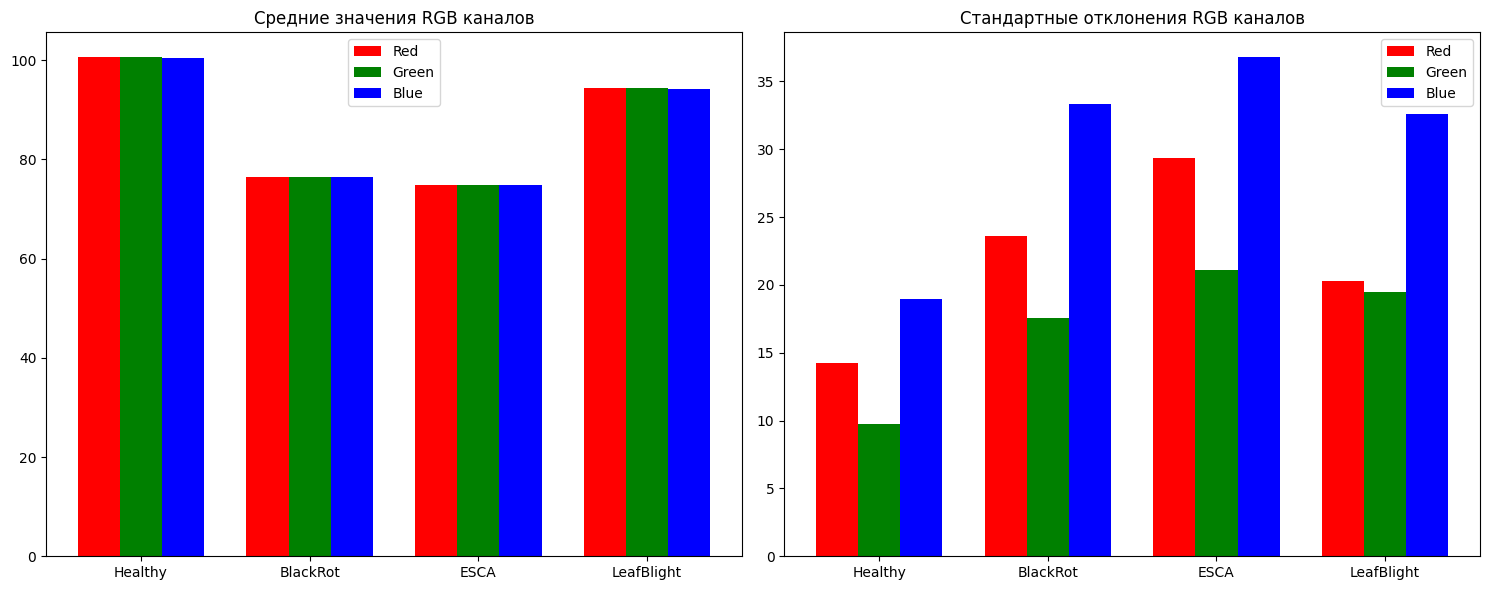

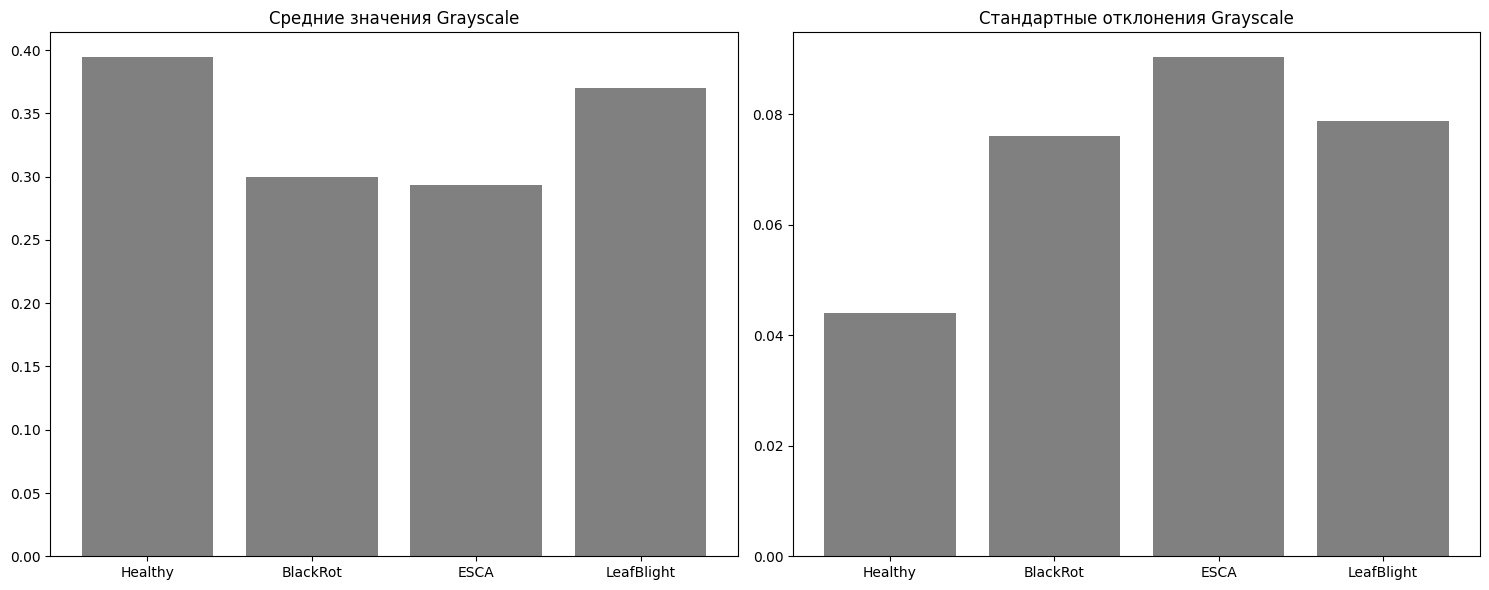

/content/drive/MyDrive/Processed Data/Healthy_corrected_blur
Путь существует


1692it [00:23, 72.61it/s] 


/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur
Путь существует


1888it [00:29, 63.74it/s] 


/content/drive/MyDrive/Processed Data/ESCA_corrected_blur
Путь существует


1920it [00:14, 137.10it/s]


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur
Путь существует


1722it [00:12, 137.55it/s]


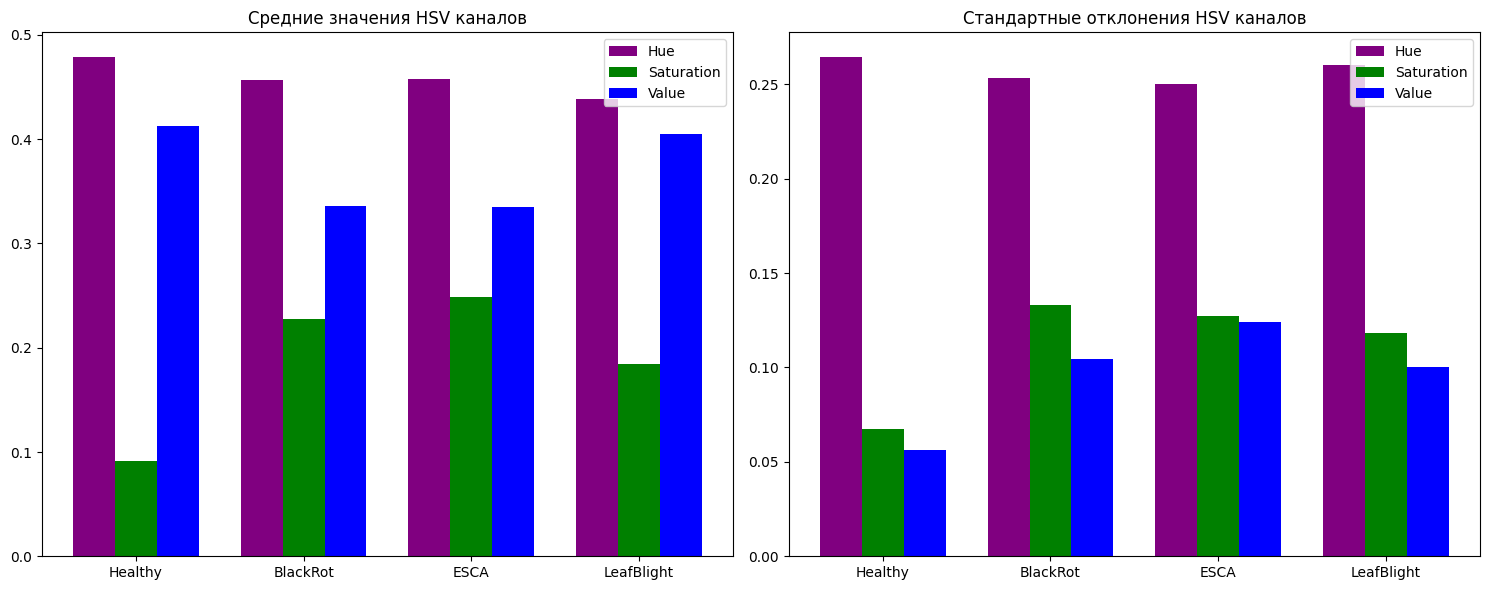

/content/drive/MyDrive/Processed Data/Healthy_corrected_blur
Путь существует


1692it [00:08, 199.17it/s]


/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur
Путь существует


1888it [00:08, 212.56it/s]


/content/drive/MyDrive/Processed Data/ESCA_corrected_blur
Путь существует


1920it [00:21, 91.04it/s] 


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur
Путь существует


1722it [00:24, 71.04it/s] 


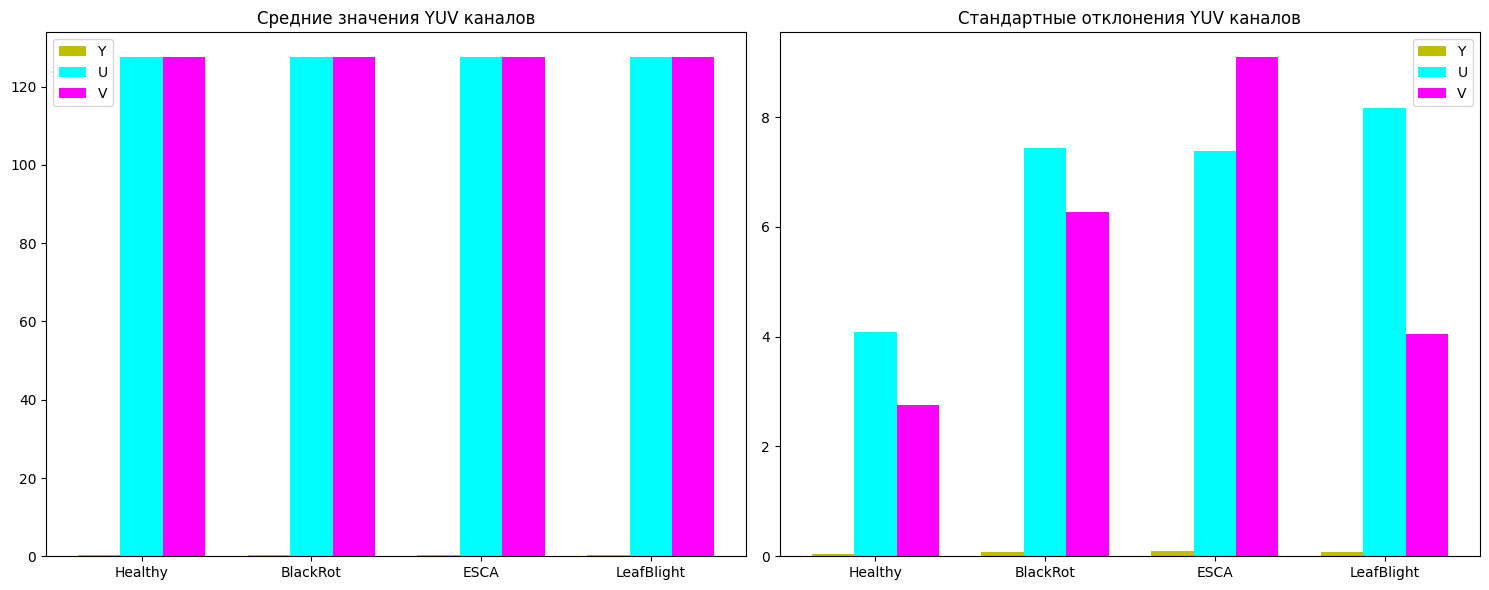

/content/drive/MyDrive/Processed Data/Healthy_corrected_blur
Путь существует


1692it [00:23, 71.37it/s] 


/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur
Путь существует


1888it [00:27, 68.69it/s] 


/content/drive/MyDrive/Processed Data/ESCA_corrected_blur
Путь существует


1920it [00:13, 139.29it/s]


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur
Путь существует


1722it [00:12, 135.09it/s]


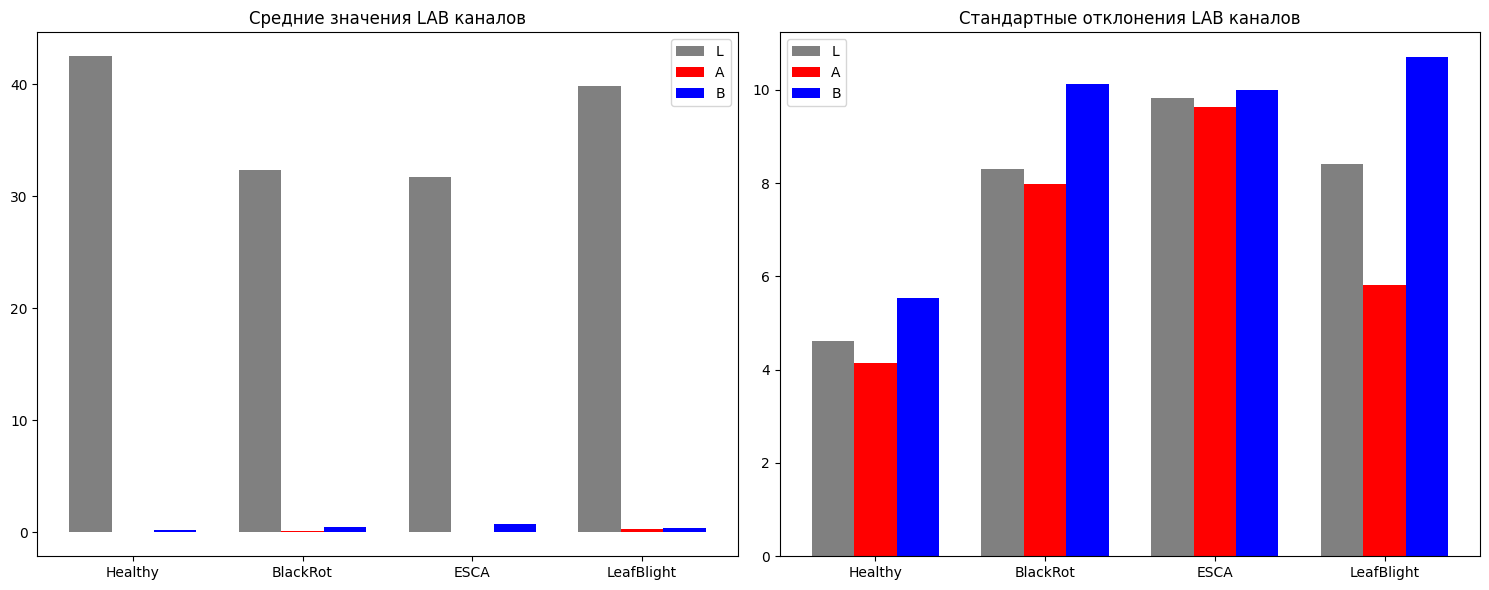

In [ ]:
from tqdm import tqdm
import os
import numpy as np
from skimage import io
from tabulate import tabulate

headers = ["Mean R", "Disp R", "Mean G", "Disp G", "Mean B", "Disp B", "Mean GR", "Disp GR", "Files"]
headers1 = ["Tag","Mean R", "Disp R", "Mean G", "Disp G", "Mean B", "Disp B", "Mean GR", "Disp GR", "Files"]
headers_yuv = ["Tag","Mean Y", "Disp Y", "Mean U", "Disp U", "Mean V", "Disp V", "Files"]
headers_hsv = ["Tag","Mean H", "Disp H", "Mean S", "Disp S", "Mean V", "Disp V", "Files"]
headers_lab = ["Tag","Mean L", "Disp L", "Mean a", "Disp a", "Mean b", "Disp b", "Files"]

folder_paths = {
"BlackRot":"/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur",
"ESCA":"/content/drive/MyDrive/Processed Data/ESCA_corrected_blur",
"Healthy":"/content/drive/MyDrive/Processed Data/Healthy_corrected_blur",
"LeafBlight":"/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur"
}


result_Healthy=test_img_folder_rgb(tag="Healthy",folder_path=folder_paths["Healthy"])
result_BlackRot=test_img_folder_rgb(tag="BlackRot",folder_path=folder_paths["BlackRot"])
result_ESCA=test_img_folder_rgb(tag="ESCA",folder_path=folder_paths["ESCA"])
result_LeafBlight=test_img_folder_rgb(tag="LeafBlight",folder_path=folder_paths["LeafBlight"])

print("".join(f"|{h:<{10}}" for h in headers1))


print_result_rgb_grey(result_Healthy)

print_result_rgb_grey(result_BlackRot)

print_result_rgb_grey(result_ESCA)

print_result_rgb_grey(result_LeafBlight)


result_Healthy=test_img_folder_yuv(tag="Healthy",folder_path=folder_paths["Healthy"])
result_BlackRot=test_img_folder_yuv(tag="BlackRot",folder_path=folder_paths["BlackRot"])
result_ESCA=test_img_folder_yuv(tag="ESCA",folder_path=folder_paths["ESCA"])
result_LeafBlight=test_img_folder_yuv(tag="LeafBlight",folder_path=folder_paths["LeafBlight"])

print("".join(f"|{h:<{10}}" for h in headers_yuv))
print_result_yuv(result_Healthy)
print_result_yuv(result_BlackRot)
print_result_yuv(result_ESCA)
print_result_yuv(result_LeafBlight)


result_Healthy=test_img_folder_hsv(tag="Healthy",folder_path=folder_paths["Healthy"])
result_BlackRot=test_img_folder_hsv(tag="BlackRot",folder_path=folder_paths["BlackRot"])
result_ESCA=test_img_folder_hsv(tag="ESCA",folder_path=folder_paths["ESCA"])
result_LeafBlight=test_img_folder_hsv(tag="LeafBlight",folder_path=folder_paths["LeafBlight"])

print("".join(f"|{h:<{10}}" for h in headers_hsv))
print_result_hsv(result_Healthy)
print_result_hsv(result_BlackRot)
print_result_hsv(result_ESCA)
print_result_hsv(result_LeafBlight)


result_Healthy=test_img_folder_lab(tag="Healthy",folder_path=folder_paths["Healthy"])
result_BlackRot=test_img_folder_lab(tag="BlackRot",folder_path=folder_paths["BlackRot"])
result_ESCA=test_img_folder_lab(tag="ESCA",folder_path=folder_paths["ESCA"])
result_LeafBlight=test_img_folder_lab(tag="LeafBlight",folder_path=folder_paths["LeafBlight"])

print("".join(f"|{h:<{10}}" for h in headers_lab))
print_result_lab(result_Healthy)
print_result_lab(result_BlackRot)
print_result_lab(result_ESCA)
print_result_lab(result_LeafBlight)


import matplotlib.pyplot as plt
import numpy as np

def plot_color_features(results, space='rgb'):
    """
    Построение диаграмм цветовых признаков
    :param results: список результатов (dict) от функций test_img_folder_*
    :param space: цветовое пространство ('rgb', 'gray', 'yuv', 'hsv', 'lab')
    """
    tags = [res['tag'] for res in results]

    if space == 'rgb':
        # RGB диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_r = [res['m_r'] for res in results]
        means_g = [res['m_g'] for res in results]
        means_b = [res['m_b'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_r, width, label='Red', color='r')
        ax1.bar(x, means_g, width, label='Green', color='g')
        ax1.bar(x + width, means_b, width, label='Blue', color='b')
        ax1.set_title('Средние значения RGB каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_r = [res['std_r'] for res in results]
        stds_g = [res['std_g'] for res in results]
        stds_b = [res['std_b'] for res in results]

        ax2.bar(x - width, stds_r, width, label='Red', color='r')
        ax2.bar(x, stds_g, width, label='Green', color='g')
        ax2.bar(x + width, stds_b, width, label='Blue', color='b')
        ax2.set_title('Стандартные отклонения RGB каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    elif space == 'gray':
        # Grayscale диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means = [res['m_gray'] for res in results]
        ax1.bar(tags, means, color='gray')
        ax1.set_title('Средние значения Grayscale')

        # Стандартные отклонения
        stds = [res['std_gray'] for res in results]
        ax2.bar(tags, stds, color='gray')
        ax2.set_title('Стандартные отклонения Grayscale')

    elif space == 'yuv':
        # YUV диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_y = [res['m_y'] for res in results]
        means_u = [res['m_u'] for res in results]
        means_v = [res['m_v'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_y, width, label='Y', color='y')
        ax1.bar(x, means_u, width, label='U', color='cyan')
        ax1.bar(x + width, means_v, width, label='V', color='magenta')
        ax1.set_title('Средние значения YUV каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_y = [res['std_y'] for res in results]
        stds_u = [res['std_u'] for res in results]
        stds_v = [res['std_v'] for res in results]

        ax2.bar(x - width, stds_y, width, label='Y', color='y')
        ax2.bar(x, stds_u, width, label='U', color='cyan')
        ax2.bar(x + width, stds_v, width, label='V', color='magenta')
        ax2.set_title('Стандартные отклонения YUV каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    elif space == 'hsv':
        # HSV диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_h = [res['m_h'] for res in results]
        means_s = [res['m_s'] for res in results]
        means_v = [res['m_v'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_h, width, label='Hue', color='purple')
        ax1.bar(x, means_s, width, label='Saturation', color='green')
        ax1.bar(x + width, means_v, width, label='Value', color='blue')
        ax1.set_title('Средние значения HSV каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_h = [res['std_h'] for res in results]
        stds_s = [res['std_s'] for res in results]
        stds_v = [res['std_v'] for res in results]

        ax2.bar(x - width, stds_h, width, label='Hue', color='purple')
        ax2.bar(x, stds_s, width, label='Saturation', color='green')
        ax2.bar(x + width, stds_v, width, label='Value', color='blue')
        ax2.set_title('Стандартные отклонения HSV каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    elif space == 'lab':
        # LAB диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_l = [res['m_l'] for res in results]
        means_a = [res['m_a'] for res in results]
        means_b = [res['m_b'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_l, width, label='L', color='gray')
        ax1.bar(x, means_a, width, label='A', color='red')
        ax1.bar(x + width, means_b, width, label='B', color='blue')
        ax1.set_title('Средние значения LAB каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_l = [res['std_l'] for res in results]
        stds_a = [res['std_a'] for res in results]
        stds_b = [res['std_b'] for res in results]

        ax2.bar(x - width, stds_l, width, label='L', color='gray')
        ax2.bar(x, stds_a, width, label='A', color='red')
        ax2.bar(x + width, stds_b, width, label='B', color='blue')
        ax2.set_title('Стандартные отклонения LAB каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    plt.tight_layout()
    plt.show()

# Пример использования:
# Получаем результаты для разных классов
results = [
    test_img_folder_rgb("Healthy", "/content/drive/MyDrive/Processed Data/Healthy_corrected_blur"),
    test_img_folder_rgb("BlackRot", "/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur"),
    test_img_folder_rgb("ESCA", "/content/drive/MyDrive/Processed Data/ESCA_corrected_blur"),
    test_img_folder_rgb("LeafBlight", "/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur")
]

# Строим диаграммы для RGB
plot_color_features(results, space='rgb')

# Строим диаграммы для Grayscale
plot_color_features(results, space='gray')




hsv_results = [
    test_img_folder_hsv("Healthy", "/content/drive/MyDrive/Processed Data/Healthy_corrected_blur"),
    test_img_folder_hsv("BlackRot", "/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur"),
    test_img_folder_hsv("ESCA", "/content/drive/MyDrive/Processed Data/ESCA_corrected_blur"),
    test_img_folder_hsv("LeafBlight", "/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur")
]
plot_color_features(hsv_results, space='hsv')


yuv_results = [
    test_img_folder_yuv("Healthy", "/content/drive/MyDrive/Processed Data/Healthy_corrected_blur"),
    test_img_folder_yuv("BlackRot", "/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur"),
    test_img_folder_yuv("ESCA", "/content/drive/MyDrive/Processed Data/ESCA_corrected_blur"),
    test_img_folder_yuv("LeafBlight", "/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur")
]
plot_color_features(yuv_results, space='yuv')

lab_results = [
    test_img_folder_lab("Healthy", "/content/drive/MyDrive/Processed Data/Healthy_corrected_blur"),
    test_img_folder_lab("BlackRot", "/content/drive/MyDrive/Processed Data/BlackRot_corrected_blur"),
    test_img_folder_lab("ESCA", "/content/drive/MyDrive/Processed Data/ESCA_corrected_blur"),
    test_img_folder_lab("LeafBlight", "/content/drive/MyDrive/Processed Data/LeafBlight_corrected_blur")
]
plot_color_features(lab_results, space='lab')

Расчет статистических показателей (Изображения: :*Серый* мир + дифференцирование пространственное) и визуализация с помощью диаграмм

Анализируем папку: /content/drive/MyDrive/Processed Data/BlackRot_corrected_sobel


1888it [00:23, 80.42it/s] 



Результаты анализа чёрно-белых изображений:
| Метка      | Файлов | Ср.ярк. | Ст.откл. | Мин.  | Макс. |
------------------------------------------------------------
| BlackRot   | 1888   |   18.10 |   29.00 |   0.0 | 231.5 |
Анализируем папку: /content/drive/MyDrive/Processed Data/ESCA_corrected_sobel


1920it [00:23, 80.05it/s] 



Результаты анализа чёрно-белых изображений:
| Метка      | Файлов | Ср.ярк. | Ст.откл. | Мин.  | Макс. |
------------------------------------------------------------
| ESCA       | 1920   |   24.60 |   38.95 |   0.0 | 250.2 |
Анализируем папку: /content/drive/MyDrive/Processed Data/Healthy_corrected_sobel


1692it [00:21, 80.50it/s] 



Результаты анализа чёрно-белых изображений:
| Метка      | Файлов | Ср.ярк. | Ст.откл. | Мин.  | Макс. |
------------------------------------------------------------
| Healthy    | 1692   |   16.39 |   25.83 |   0.0 | 220.5 |
Анализируем папку: /content/drive/MyDrive/Processed Data/LeafBlight_corrected_sobel


1722it [00:21, 81.35it/s] 



Результаты анализа чёрно-белых изображений:
| Метка      | Файлов | Ср.ярк. | Ст.откл. | Мин.  | Макс. |
------------------------------------------------------------
| LeafBlight | 1722   |   22.74 |   34.82 |   0.0 | 246.5 |
Анализируем папку: /content/drive/MyDrive/Processed Data/BlackRot_corrected_sobel


1888it [00:10, 173.90it/s]



Результаты анализа чёрно-белых изображений:
| Метка      | Файлов | Ср.ярк. | Ст.откл. | Мин.  | Макс. |
------------------------------------------------------------
| BlackRot   | 1888   |   18.10 |   29.00 |   0.0 | 231.5 |
Анализируем папку: /content/drive/MyDrive/Processed Data/ESCA_corrected_sobel


1920it [00:11, 173.38it/s]



Результаты анализа чёрно-белых изображений:
| Метка      | Файлов | Ср.ярк. | Ст.откл. | Мин.  | Макс. |
------------------------------------------------------------
| ESCA       | 1920   |   24.60 |   38.95 |   0.0 | 250.2 |
Анализируем папку: /content/drive/MyDrive/Processed Data/Healthy_corrected_sobel


1692it [00:09, 176.41it/s]



Результаты анализа чёрно-белых изображений:
| Метка      | Файлов | Ср.ярк. | Ст.откл. | Мин.  | Макс. |
------------------------------------------------------------
| Healthy    | 1692   |   16.39 |   25.83 |   0.0 | 220.5 |
Анализируем папку: /content/drive/MyDrive/Processed Data/LeafBlight_corrected_sobel


1722it [00:10, 163.08it/s]



Результаты анализа чёрно-белых изображений:
| Метка      | Файлов | Ср.ярк. | Ст.откл. | Мин.  | Макс. |
------------------------------------------------------------
| LeafBlight | 1722   |   22.74 |   34.82 |   0.0 | 246.5 |


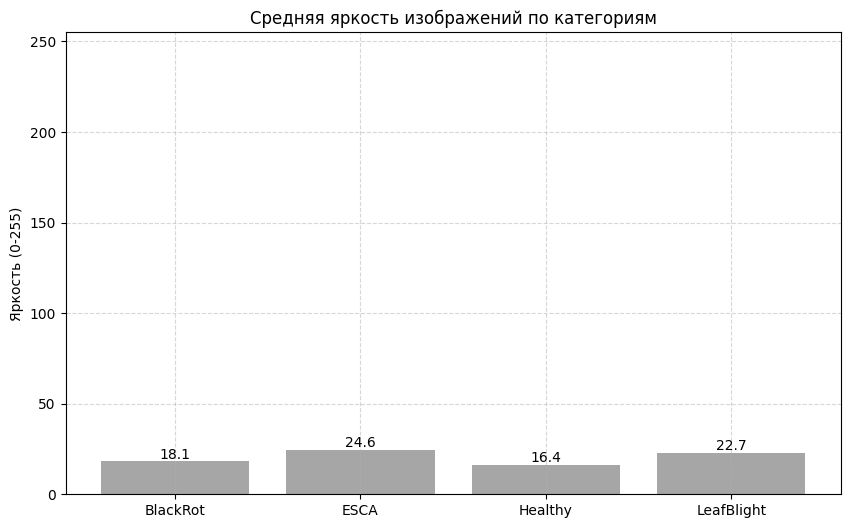

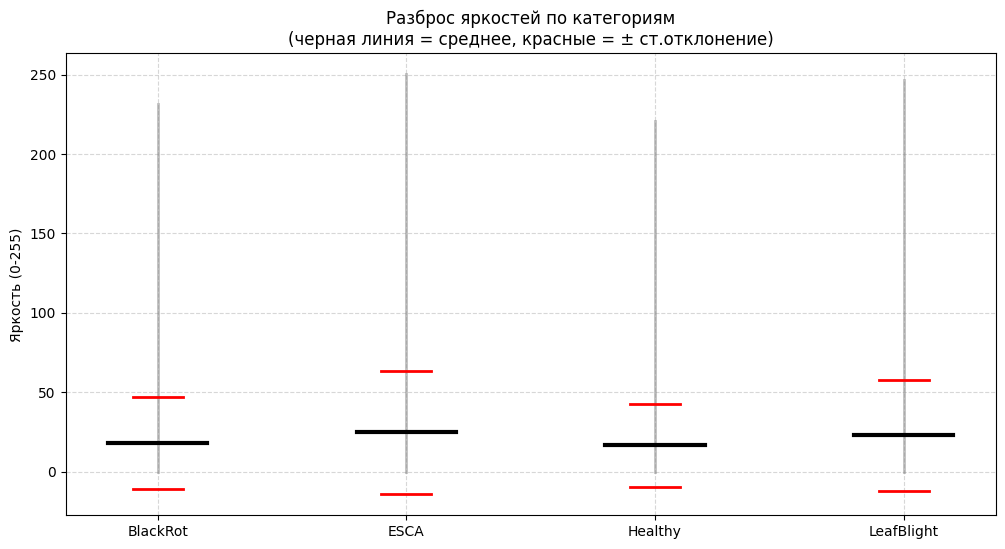

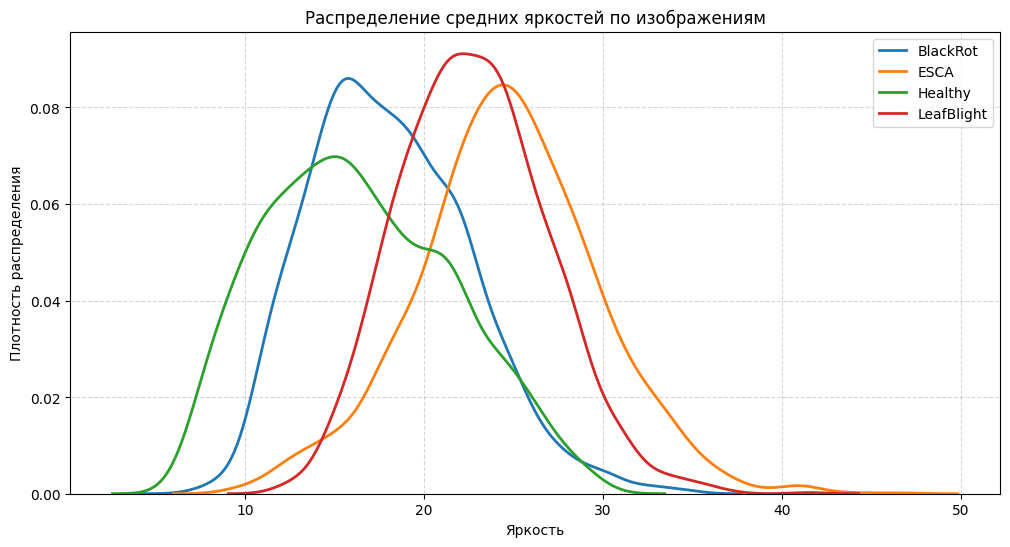

/tmp/ipython-input-16-2503375622.py:192: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=tags, patch_artist=True,


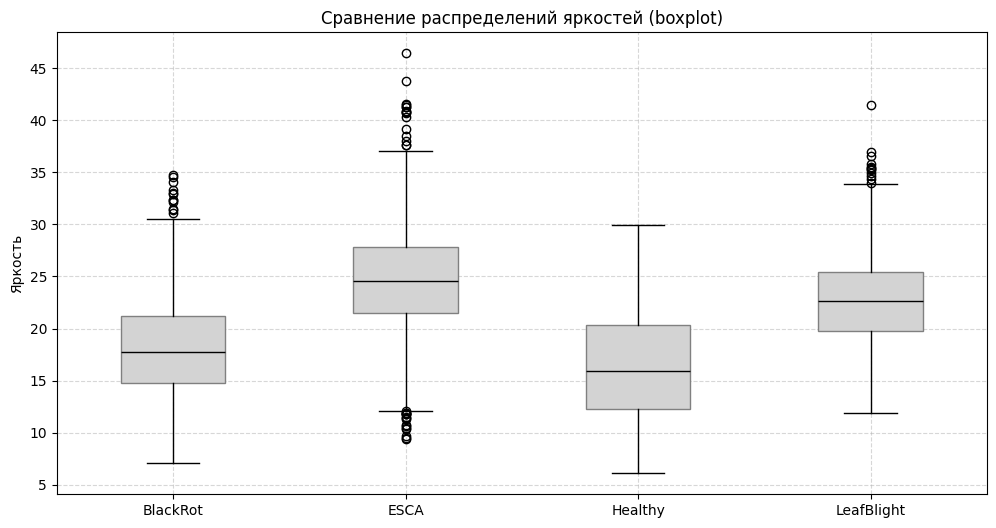

In [ ]:
from tqdm import tqdm
import os
import numpy as np
from skimage import io
from tabulate import tabulate

headers = ["Mean R", "Disp R", "Mean G", "Disp G", "Mean B", "Disp B", "Mean GR", "Disp GR", "Files"]
headers1 = ["Tag","Mean R", "Disp R", "Mean G", "Disp G", "Mean B", "Disp B", "Mean GR", "Disp GR", "Files"]
headers_yuv = ["Tag","Mean Y", "Disp Y", "Mean U", "Disp U", "Mean V", "Disp V", "Files"]
headers_hsv = ["Tag","Mean H", "Disp H", "Mean S", "Disp S", "Mean V", "Disp V", "Files"]
headers_lab = ["Tag","Mean L", "Disp L", "Mean a", "Disp a", "Mean b", "Disp b", "Files"]

folder_paths = {
"BlackRot":"/content/drive/MyDrive/Processed Data/BlackRot_corrected_sobel",
"ESCA":"/content/drive/MyDrive/Processed Data/ESCA_corrected_sobel",
"Healthy":"/content/drive/MyDrive/Processed Data/Healthy_corrected_sobel",
"LeafBlight":"/content/drive/MyDrive/Processed Data/LeafBlight_corrected_sobel"
}


from tqdm import tqdm
import os
import numpy as np
from skimage import io
import math

def analyze_grayscale_folder(tag="tag", folder_path=""):
    """
    Анализирует папку с чёрно-белыми изображениями
    Возвращает статистики по яркости
    """
    print(f"Анализируем папку: {folder_path}")

    if not os.path.exists(folder_path):
        print("Ошибка: путь не существует")
        return None

    count = 0
    arr_mean = []    # Средняя яркость
    arr_std = []     # Стандартное отклонение
    arr_min = []      # Минимальная яркость
    arr_max = []      # Максимальная яркость

    with os.scandir(folder_path) as entries:
        for entry in tqdm(entries):
            if entry.is_file() and entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    # Загружаем изображение в градациях серого
                    image = io.imread(entry.path, as_gray=True)

                    # Проверяем что изображение 2D (чёрно-белое)
                    if len(image.shape) != 2:
                        print(f"Пропускаем {entry.name} - не чёрно-белое изображение")
                        continue

                    # Нормализуем значения пикселей к [0, 255] если нужно
                    if image.max() <= 1.0:
                        image = (image * 255).astype(np.uint8)

                    # Вычисляем статистики
                    pixels = image.flatten()
                    arr_mean.append(np.mean(pixels))
                    arr_std.append(math.sqrt(np.var(pixels)))
                    arr_min.append(np.min(pixels))
                    arr_max.append(np.max(pixels))

                    count += 1
                except Exception as e:
                    print(f"Ошибка обработки {entry.name}: {str(e)}")

    if count == 0:
        print("Нет подходящих изображений в папке")
        return None

    # Собираем результаты
    result = {
        "tag": tag,
        "num_files": count,
        "mean_brightness": np.mean(arr_mean),
        "std_brightness": np.mean(arr_std),
        "min_brightness": np.mean(arr_min),
        "max_brightness": np.mean(arr_max),
        "all_means": arr_mean,
        "all_stds": arr_std,
        "all_mins": arr_min,
        "all_maxs": arr_max
    }

    return result

def print_grayscale_stats(result):
    """Выводит статистики в табличном формате"""
    print("\nРезультаты анализа чёрно-белых изображений:")
    print(f"| {'Метка':<10} | {'Файлов':<6} | {'Ср.ярк.':<7} | {'Ст.откл.':<7} | {'Мин.':<5} | {'Макс.':<5} |")
    print("-"*60)
    print(f"| {result['tag']:<10} | {result['num_files']:<6} | {result['mean_brightness']:7.2f} | "
          f"{result['std_brightness']:7.2f} | {result['min_brightness']:5.1f} | {result['max_brightness']:5.1f} |")

# Пример использования:
folder_paths = {
      "BlackRot":"/content/drive/MyDrive/Processed Data/BlackRot_corrected_sobel",
      "ESCA":"/content/drive/MyDrive/Processed Data/ESCA_corrected_sobel",
      "Healthy":"/content/drive/MyDrive/Processed Data/Healthy_corrected_sobel",
      "LeafBlight":"/content/drive/MyDrive/Processed Data/LeafBlight_corrected_sobel"
}

results = []
for name, path in folder_paths.items():
    res = analyze_grayscale_folder(tag=name, folder_path=path)
    if res:
        results.append(res)
        print_grayscale_stats(res)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_grayscale_results(results):
    """
    Визуализирует результаты анализа чёрно-белых изображений
    :param results: список результатов от analyze_grayscale_folder()
    """
    if not results:
        print("Нет данных для визуализации")
        return

    # Подготовка данных
    tags = [res['tag'] for res in results]
    means = [res['mean_brightness'] for res in results]
    stds = [res['std_brightness'] for res in results]
    mins = [res['min_brightness'] for res in results]
    maxs = [res['max_brightness'] for res in results]

    # 1. Сравнительная диаграмма средних яркостей
    plt.figure(figsize=(10, 6))
    bars = plt.bar(tags, means, color='gray', alpha=0.7)
    plt.title('Средняя яркость изображений по категориям')
    plt.ylabel('Яркость (0-255)')
    plt.ylim(0, 255)

    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom')

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # 2. Диаграмма размаха яркостей (min, mean, max)
    plt.figure(figsize=(12, 6))

    for i, res in enumerate(results):
        # Линия от min до max
        plt.plot([i, i], [res['min_brightness'], res['max_brightness']],
                color='gray', alpha=0.5, linewidth=2)
        # Прямоугольник для среднего ± std
        plt.plot([i-0.2, i+0.2], [res['mean_brightness'], res['mean_brightness']],
                color='black', linewidth=3)
        plt.plot([i-0.1, i+0.1],
                [res['mean_brightness'] - res['std_brightness'],
                 res['mean_brightness'] - res['std_brightness']],
                color='red', linewidth=2)
        plt.plot([i-0.1, i+0.1],
                [res['mean_brightness'] + res['std_brightness'],
                 res['mean_brightness'] + res['std_brightness']],
                color='red', linewidth=2)

    plt.xticks(range(len(tags)), tags)
    plt.title('Разброс яркостей по категориям\n(черная линия = среднее, красные = ± ст.отклонение)')
    plt.ylabel('Яркость (0-255)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # 3. Совмещённые гистограммы распределения яркостей
    plt.figure(figsize=(12, 6))

    for res in results:
        sns.kdeplot(res['all_means'], label=res['tag'], linewidth=2)

    plt.title('Распределение средних яркостей по изображениям')
    plt.xlabel('Яркость')
    plt.ylabel('Плотность распределения')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # 4. Boxplot для сравнения распределений
    plt.figure(figsize=(12, 6))

    data_to_plot = [res['all_means'] for res in results]
    plt.boxplot(data_to_plot, labels=tags, patch_artist=True,
               boxprops=dict(facecolor='lightgray', color='gray'),
               medianprops=dict(color='black'))

    plt.title('Сравнение распределений яркостей (boxplot)')
    plt.ylabel('Яркость')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Пример использования с предыдущим кодом анализа:
folder_paths = {
      "BlackRot":"/content/drive/MyDrive/Processed Data/BlackRot_corrected_sobel",
      "ESCA":"/content/drive/MyDrive/Processed Data/ESCA_corrected_sobel",
      "Healthy":"/content/drive/MyDrive/Processed Data/Healthy_corrected_sobel",
      "LeafBlight":"/content/drive/MyDrive/Processed Data/LeafBlight_corrected_sobel"
}

# Анализируем изображения
results = []
for name, path in folder_paths.items():
    res = analyze_grayscale_folder(tag=name, folder_path=path)
    if res:
        results.append(res)
        print_grayscale_stats(res)

# Визуализируем результаты
if results:
    visualize_grayscale_results(results)
else:
    print("Не удалось получить результаты для визуализации")








Расчет статистических показателей (Изображения: :*Серый* мир + контрастирование) и визуализация с помощью диаграмм

/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast
Путь существует


1692it [01:05, 25.74it/s] 


/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast
Путь существует


1888it [00:47, 40.02it/s] 


/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast
Путь существует


1920it [00:50, 38.01it/s] 


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast
Путь существует


1722it [00:43, 39.74it/s] 


|Tag       |Mean Y    |Disp Y    |Mean U    |Disp U    |Mean V    |Disp V    |Files     
|   Healthy|      0.78|      0.11|    126.91|      5.53|    127.17|      3.44|      1692|
|  BlackRot|      0.64|      0.15|    126.06|      9.50|    127.19|      8.95|      1888|
|      ESCA|      0.62|      0.18|    125.42|      8.48|    126.70|     12.33|      1920|
|LeafBlight|      0.74|      0.16|    124.94|     10.04|    127.79|      5.56|      1722|
/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast
Путь существует


1692it [00:27, 61.21it/s] 


/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast
Путь существует


1888it [00:30, 61.77it/s] 


/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast
Путь существует


1920it [00:31, 61.64it/s] 


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast
Путь существует


1722it [00:29, 58.35it/s] 


|Tag       |Mean H    |Disp H    |Mean S    |Disp S    |Mean V    |Disp V    |Files     
|   Healthy|      0.48|      0.26|      0.06|      0.05|      0.80|      0.11|      1692|
|  BlackRot|      0.46|      0.26|      0.15|      0.09|      0.68|      0.16|      1888|
|      ESCA|      0.46|      0.25|      0.16|      0.10|      0.67|      0.18|      1920|
|LeafBlight|      0.43|      0.26|      0.13|      0.10|      0.78|      0.16|      1722|
/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast
Путь существует


1692it [00:14, 117.31it/s]


/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast
Путь существует


1888it [00:15, 119.84it/s]


/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast
Путь существует


1920it [00:16, 119.84it/s]


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast
Путь существует


1722it [00:13, 123.54it/s]


|Tag       |Mean L    |Disp L    |Mean a    |Disp a    |Mean b    |Disp b    |Files     
|   Healthy|     80.18|      9.86|     -0.56|      4.79|      0.82|      6.67|      1692|
|  BlackRot|     66.89|     13.57|     -0.96|      9.47|      2.17|     11.66|      1888|
|      ESCA|     65.27|     16.44|     -1.71|     10.84|      3.07|     10.48|      1920|
|LeafBlight|     76.35|     14.99|     -1.02|      6.69|      3.19|     11.94|      1722|
/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast
Путь существует


1692it [00:20, 81.10it/s] 


/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast
Путь существует


1888it [00:24, 75.84it/s] 


/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast
Путь существует


1920it [00:25, 74.01it/s] 


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast
Путь существует


1722it [00:22, 77.87it/s] 


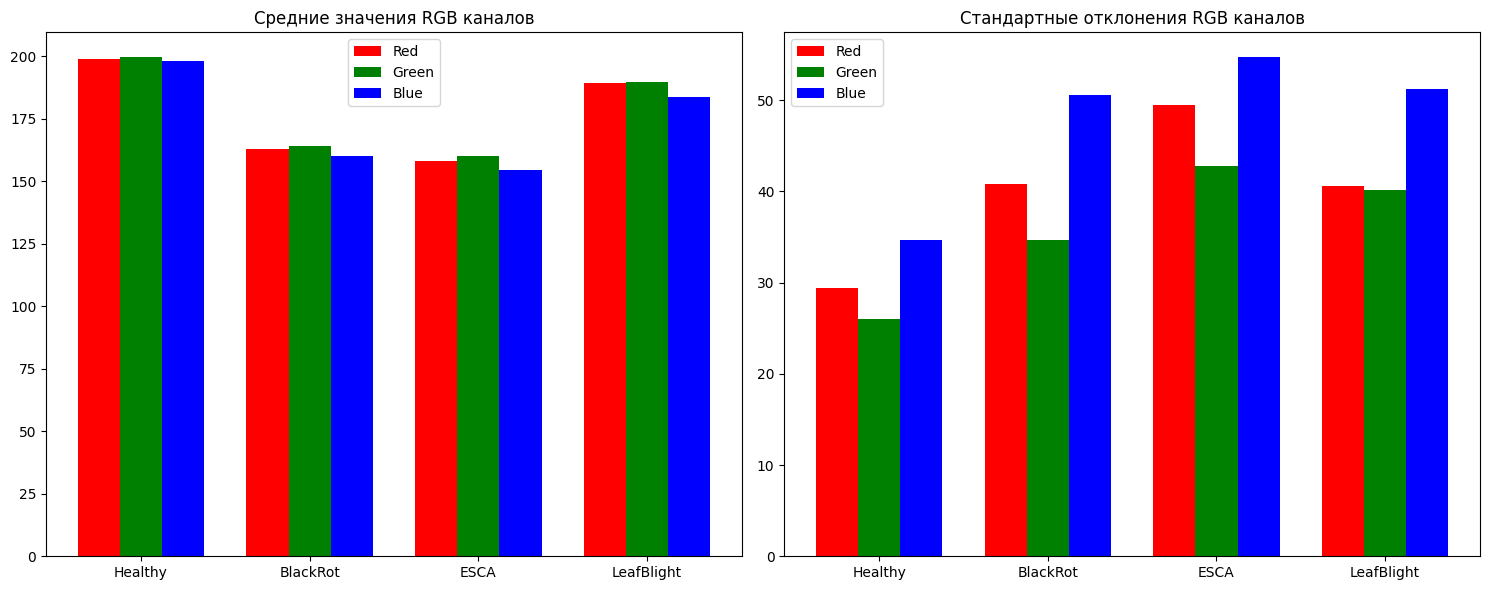

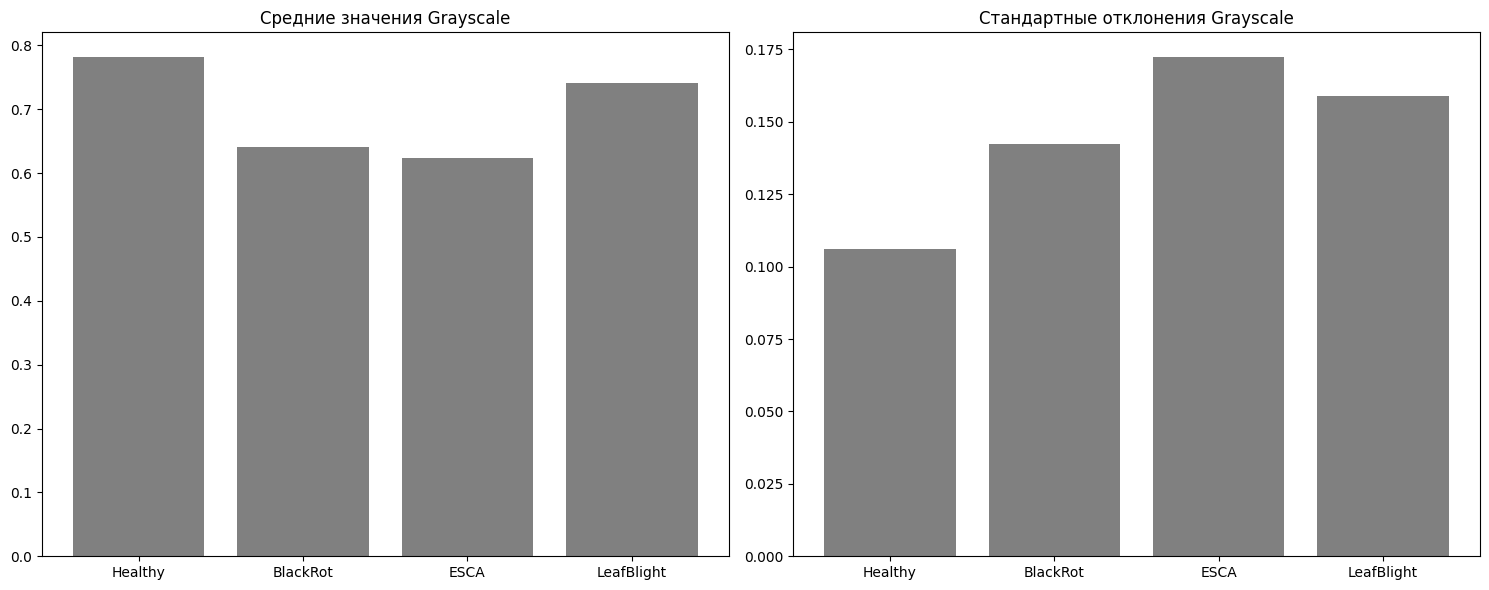

/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast
Путь существует


1692it [00:14, 116.57it/s]


/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast
Путь существует


1888it [00:16, 115.18it/s]


/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast
Путь существует


1920it [00:16, 114.29it/s]


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast
Путь существует


1722it [00:15, 113.68it/s]


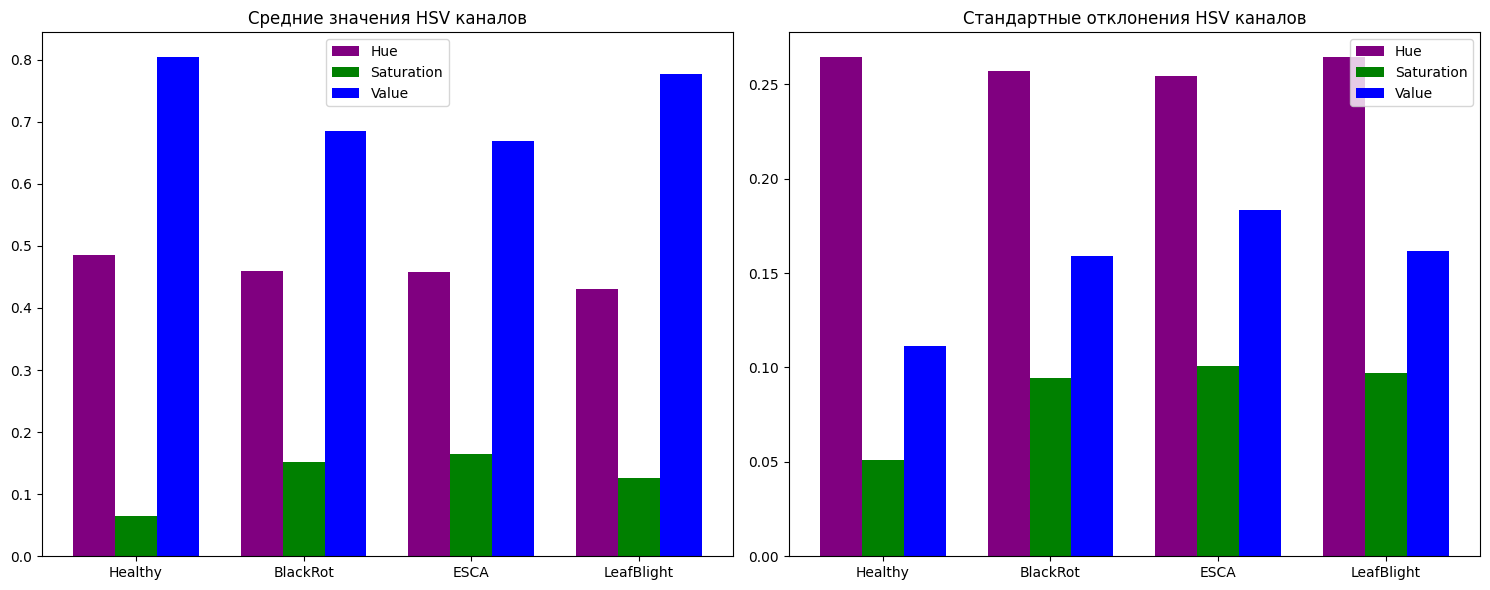

/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast
Путь существует


1692it [00:30, 56.35it/s] 


/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast
Путь существует


1888it [00:26, 71.39it/s] 


/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast
Путь существует


1920it [00:29, 65.24it/s] 


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast
Путь существует


1722it [00:25, 68.02it/s] 


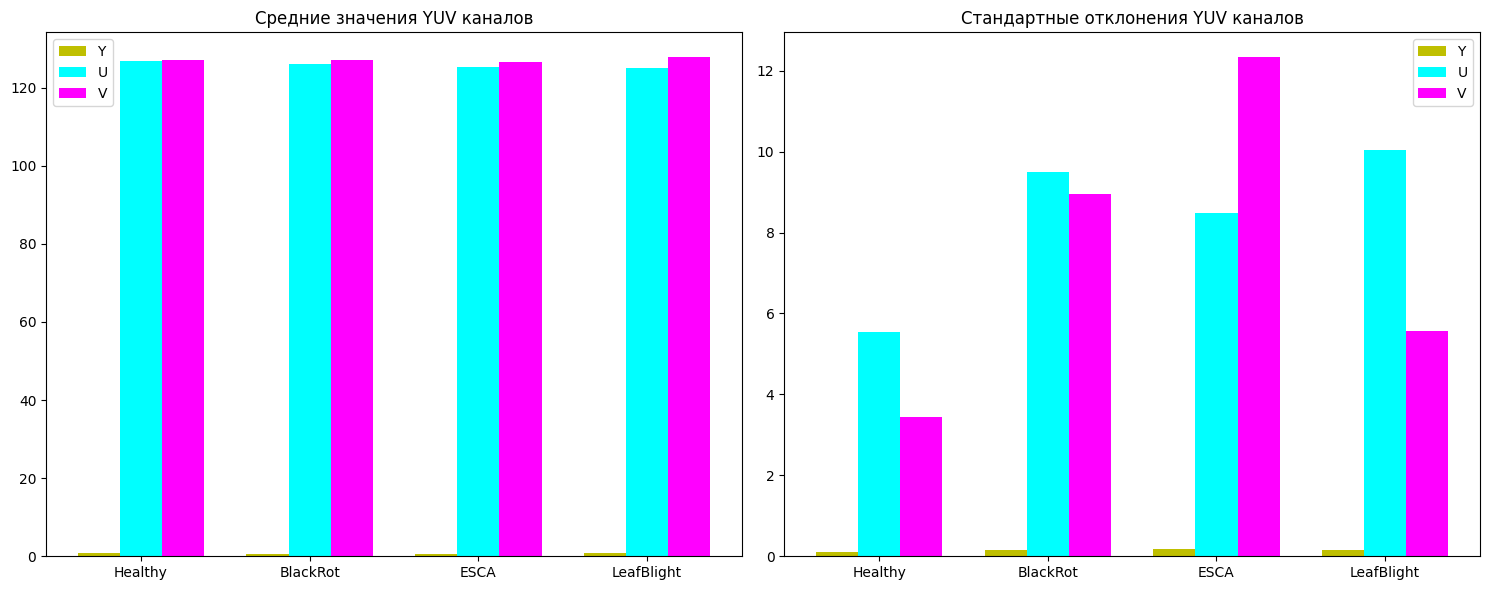

/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast
Путь существует


1692it [00:14, 119.18it/s]


/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast
Путь существует


1888it [00:15, 122.85it/s]


/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast
Путь существует


1920it [00:16, 117.26it/s]


/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast
Путь существует


1722it [00:14, 119.49it/s]


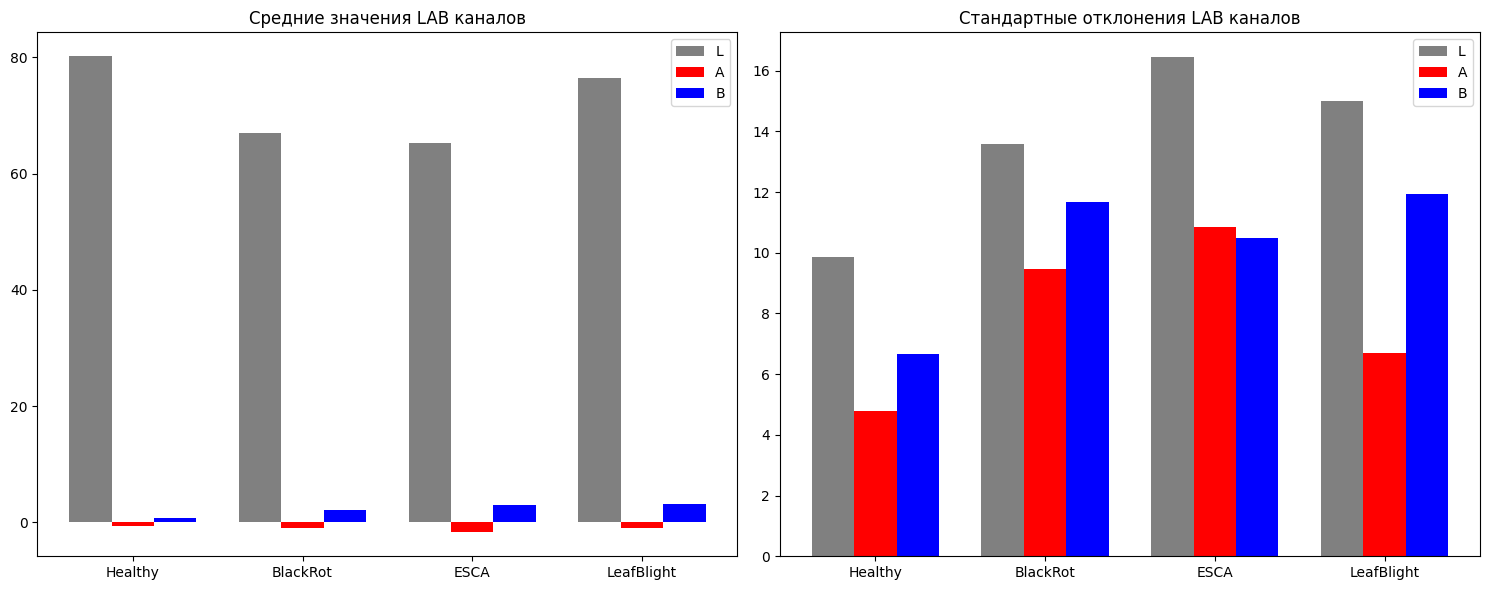

In [ ]:
from tqdm import tqdm
import os
import numpy as np
from skimage import io
from tabulate import tabulate

headers = ["Mean R", "Disp R", "Mean G", "Disp G", "Mean B", "Disp B", "Mean GR", "Disp GR", "Files"]
headers1 = ["Tag","Mean R", "Disp R", "Mean G", "Disp G", "Mean B", "Disp B", "Mean GR", "Disp GR", "Files"]
headers_yuv = ["Tag","Mean Y", "Disp Y", "Mean U", "Disp U", "Mean V", "Disp V", "Files"]
headers_hsv = ["Tag","Mean H", "Disp H", "Mean S", "Disp S", "Mean V", "Disp V", "Files"]
headers_lab = ["Tag","Mean L", "Disp L", "Mean a", "Disp a", "Mean b", "Disp b", "Files"]

folder_paths = {
"BlackRot":"/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast",
"ESCA":"/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast",
"Healthy":"/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast",
"LeafBlight":"/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast"
}





result_Healthy=test_img_folder_yuv(tag="Healthy",folder_path=folder_paths["Healthy"])
result_BlackRot=test_img_folder_yuv(tag="BlackRot",folder_path=folder_paths["BlackRot"])
result_ESCA=test_img_folder_yuv(tag="ESCA",folder_path=folder_paths["ESCA"])
result_LeafBlight=test_img_folder_yuv(tag="LeafBlight",folder_path=folder_paths["LeafBlight"])

print("".join(f"|{h:<{10}}" for h in headers_yuv))
print_result_yuv(result_Healthy)
print_result_yuv(result_BlackRot)
print_result_yuv(result_ESCA)
print_result_yuv(result_LeafBlight)


result_Healthy=test_img_folder_hsv(tag="Healthy",folder_path=folder_paths["Healthy"])
result_BlackRot=test_img_folder_hsv(tag="BlackRot",folder_path=folder_paths["BlackRot"])
result_ESCA=test_img_folder_hsv(tag="ESCA",folder_path=folder_paths["ESCA"])
result_LeafBlight=test_img_folder_hsv(tag="LeafBlight",folder_path=folder_paths["LeafBlight"])

print("".join(f"|{h:<{10}}" for h in headers_hsv))
print_result_hsv(result_Healthy)
print_result_hsv(result_BlackRot)
print_result_hsv(result_ESCA)
print_result_hsv(result_LeafBlight)


result_Healthy=test_img_folder_lab(tag="Healthy",folder_path=folder_paths["Healthy"])
result_BlackRot=test_img_folder_lab(tag="BlackRot",folder_path=folder_paths["BlackRot"])
result_ESCA=test_img_folder_lab(tag="ESCA",folder_path=folder_paths["ESCA"])
result_LeafBlight=test_img_folder_lab(tag="LeafBlight",folder_path=folder_paths["LeafBlight"])

print("".join(f"|{h:<{10}}" for h in headers_lab))
print_result_lab(result_Healthy)
print_result_lab(result_BlackRot)
print_result_lab(result_ESCA)
print_result_lab(result_LeafBlight)


import matplotlib.pyplot as plt
import numpy as np

def plot_color_features(results, space='rgb'):
    """
    Построение диаграмм цветовых признаков
    :param results: список результатов (dict) от функций test_img_folder_*
    :param space: цветовое пространство ('rgb', 'gray', 'yuv', 'hsv', 'lab')
    """
    tags = [res['tag'] for res in results]

    if space == 'rgb':
        # RGB диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_r = [res['m_r'] for res in results]
        means_g = [res['m_g'] for res in results]
        means_b = [res['m_b'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_r, width, label='Red', color='r')
        ax1.bar(x, means_g, width, label='Green', color='g')
        ax1.bar(x + width, means_b, width, label='Blue', color='b')
        ax1.set_title('Средние значения RGB каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_r = [res['std_r'] for res in results]
        stds_g = [res['std_g'] for res in results]
        stds_b = [res['std_b'] for res in results]

        ax2.bar(x - width, stds_r, width, label='Red', color='r')
        ax2.bar(x, stds_g, width, label='Green', color='g')
        ax2.bar(x + width, stds_b, width, label='Blue', color='b')
        ax2.set_title('Стандартные отклонения RGB каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    elif space == 'gray':
        # Grayscale диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means = [res['m_gray'] for res in results]
        ax1.bar(tags, means, color='gray')
        ax1.set_title('Средние значения Grayscale')

        # Стандартные отклонения
        stds = [res['std_gray'] for res in results]
        ax2.bar(tags, stds, color='gray')
        ax2.set_title('Стандартные отклонения Grayscale')

    elif space == 'yuv':
        # YUV диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_y = [res['m_y'] for res in results]
        means_u = [res['m_u'] for res in results]
        means_v = [res['m_v'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_y, width, label='Y', color='y')
        ax1.bar(x, means_u, width, label='U', color='cyan')
        ax1.bar(x + width, means_v, width, label='V', color='magenta')
        ax1.set_title('Средние значения YUV каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_y = [res['std_y'] for res in results]
        stds_u = [res['std_u'] for res in results]
        stds_v = [res['std_v'] for res in results]

        ax2.bar(x - width, stds_y, width, label='Y', color='y')
        ax2.bar(x, stds_u, width, label='U', color='cyan')
        ax2.bar(x + width, stds_v, width, label='V', color='magenta')
        ax2.set_title('Стандартные отклонения YUV каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    elif space == 'hsv':
        # HSV диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_h = [res['m_h'] for res in results]
        means_s = [res['m_s'] for res in results]
        means_v = [res['m_v'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_h, width, label='Hue', color='purple')
        ax1.bar(x, means_s, width, label='Saturation', color='green')
        ax1.bar(x + width, means_v, width, label='Value', color='blue')
        ax1.set_title('Средние значения HSV каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_h = [res['std_h'] for res in results]
        stds_s = [res['std_s'] for res in results]
        stds_v = [res['std_v'] for res in results]

        ax2.bar(x - width, stds_h, width, label='Hue', color='purple')
        ax2.bar(x, stds_s, width, label='Saturation', color='green')
        ax2.bar(x + width, stds_v, width, label='Value', color='blue')
        ax2.set_title('Стандартные отклонения HSV каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    elif space == 'lab':
        # LAB диаграммы
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Средние значения
        means_l = [res['m_l'] for res in results]
        means_a = [res['m_a'] for res in results]
        means_b = [res['m_b'] for res in results]

        x = np.arange(len(tags))
        width = 0.25

        ax1.bar(x - width, means_l, width, label='L', color='gray')
        ax1.bar(x, means_a, width, label='A', color='red')
        ax1.bar(x + width, means_b, width, label='B', color='blue')
        ax1.set_title('Средние значения LAB каналов')
        ax1.set_xticks(x)
        ax1.set_xticklabels(tags)
        ax1.legend()

        # Стандартные отклонения
        stds_l = [res['std_l'] for res in results]
        stds_a = [res['std_a'] for res in results]
        stds_b = [res['std_b'] for res in results]

        ax2.bar(x - width, stds_l, width, label='L', color='gray')
        ax2.bar(x, stds_a, width, label='A', color='red')
        ax2.bar(x + width, stds_b, width, label='B', color='blue')
        ax2.set_title('Стандартные отклонения LAB каналов')
        ax2.set_xticks(x)
        ax2.set_xticklabels(tags)
        ax2.legend()

    plt.tight_layout()
    plt.show()

# Пример использования:
# Получаем результаты для разных классов
results = [
    test_img_folder_rgb("Healthy", "/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast"),
    test_img_folder_rgb("BlackRot", "/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast"),
    test_img_folder_rgb("ESCA", "/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast"),
    test_img_folder_rgb("LeafBlight", "/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast")
]

# Строим диаграммы для RGB
plot_color_features(results, space='rgb')

# Строим диаграммы для Grayscale
plot_color_features(results, space='gray')




hsv_results = [
    test_img_folder_hsv("Healthy", "/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast"),
    test_img_folder_hsv("BlackRot", "/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast"),
    test_img_folder_hsv("ESCA", "/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast"),
    test_img_folder_hsv("LeafBlight", "/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast")
]
plot_color_features(hsv_results, space='hsv')


yuv_results = [
    test_img_folder_yuv("Healthy", "/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast"),
    test_img_folder_yuv("BlackRot", "/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast"),
    test_img_folder_yuv("ESCA", "/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast"),
    test_img_folder_yuv("LeafBlight", "/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast")
]
plot_color_features(yuv_results, space='yuv')

lab_results = [
    test_img_folder_lab("Healthy", "/content/drive/MyDrive/Processed Data/Healthy_corrected_contrast"),
    test_img_folder_lab("BlackRot", "/content/drive/MyDrive/Processed Data/BlackRot_corrected_contrast"),
    test_img_folder_lab("ESCA", "/content/drive/MyDrive/Processed Data/ESCA_corrected_contrast"),
    test_img_folder_lab("LeafBlight", "/content/drive/MyDrive/Processed Data/LeafBlight_corrected_contrast")
]
plot_color_features(lab_results, space='lab')

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm  # для прогресс-бара (опционально)

# Пути к исходным и выходным данным
input_paths = {
    "1": "/content/drive/MyDrive/Gray_world",
}

output_base = "/content/drive/MyDrive/Original Data/train_corrected2"
os.makedirs(output_base, exist_ok=True)

# Функция коррекции "Серый мир"
def gray_world(image):
    mean_b = np.mean(image[:, :, 0])
    mean_g = np.mean(image[:, :, 1])
    mean_r = np.mean(image[:, :, 2])
    mean_gray = (mean_b + mean_g + mean_r) / 3.0

    scale_b = mean_gray / (mean_b + 1e-6)  # +1e-6 чтобы избежать деления на 0
    scale_g = mean_gray / (mean_g + 1e-6)
    scale_r = mean_gray / (mean_r + 1e-6)

    corrected = image.copy().astype(np.float32)
    corrected[:, :, 0] = np.clip(corrected[:, :, 0] * scale_b, 0, 255)
    corrected[:, :, 1] = np.clip(corrected[:, :, 1] * scale_g, 0, 255)
    corrected[:, :, 2] = np.clip(corrected[:, :, 2] * scale_r, 0, 255)

    return corrected.astype(np.uint8)

# Обработка всех изображений
for class_name, input_path in input_paths.items():
    output_path = os.path.join(output_base, f"{class_name}_corrected1")
    os.makedirs(output_path, exist_ok=True)

    print(f"Обработка: {class_name}...")
    for filename in tqdm(os.listdir(input_path)):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_path, filename)
            img = cv2.imread(img_path)

            if img is not None:
                corrected_img = gray_world(img)
                cv2.imwrite(os.path.join(output_path, filename), corrected_img)

print("Готово! Результаты сохранены в:", output_base)

Обработка: 1...


100%|██████████| 3/3 [00:00<00:00, 28.66it/s]

Готово! Результаты сохранены в: /content/drive/MyDrive/Original Data/train_corrected2


ЗАПУСК КОРРЕКЦИИ БАЛАНСА БЕЛОГО 'СЕРЫЙ МИР'
ТЕСТИРОВАНИЕ НА ОДНОМ ИЗОБРАЖЕНИИ
Тестовый файл: Изображение WhatsApp 2025-09-26 в 18.42.25_b517c2af.jpg
Размер изображения: (505, 459, 3)
Тип данных: uint8
ТЕСТ:
  До: R=152.3, G=173.8, B=143.4
  После: R=155.0, G=156.0, B=149.2
  Макс. разница между каналами: 30.4 -> 6.8

Сравнительное изображение сохранено как: test_comparison.jpg

НАЧИНАЕМ ОБРАБОТКУ ВСЕХ ИЗОБРАЖЕНИЙ
Обработка класса: 1
Входная папка: /content/drive/MyDrive/Gray_world
Выходная папка: /content/drive/MyDrive/Original Data/train_corrected2/1_corrected
--------------------------------------------------
Найдено 3 изображений


Обработка 1:   0%|          | 0/3 [00:00<?, ?it/s]

Изображение WhatsApp 2025-09-26 в 18.42.25_b517c2af.jpg:
  До: R=152.3, G=173.8, B=143.4
  После: R=155.0, G=156.0, B=149.2
  Макс. разница между каналами: 30.4 -> 6.8



Обработка 1: 100%|██████████| 3/3 [00:00<00:00, 12.71it/s]

Изображение WhatsApp 2025-09-26 в 18.42.25_dff41307.jpg:
  До: R=170.7, G=182.4, B=126.9
  После: R=159.5, G=159.5, B=136.1
  Макс. разница между каналами: 55.5 -> 23.5

Изображение WhatsApp 2025-09-26 в 18.42.25_7fcdfa19.jpg:
  До: R=182.8, G=204.9, B=165.1
  После: R=183.5, G=183.8, B=173.9
  Макс. разница между каналами: 39.7 -> 9.8


ОБРАБОТКА ЗАВЕРШЕНА
Успешно обработано: 3 изображений
Пропущено: 0 изображений
Среднее уменьшение разницы между каналами: 28.51
Результаты сохранены в: /content/drive/MyDrive/Original Data/train_corrected2

АНАЛИЗ РЕЗУЛЬТАТОВ


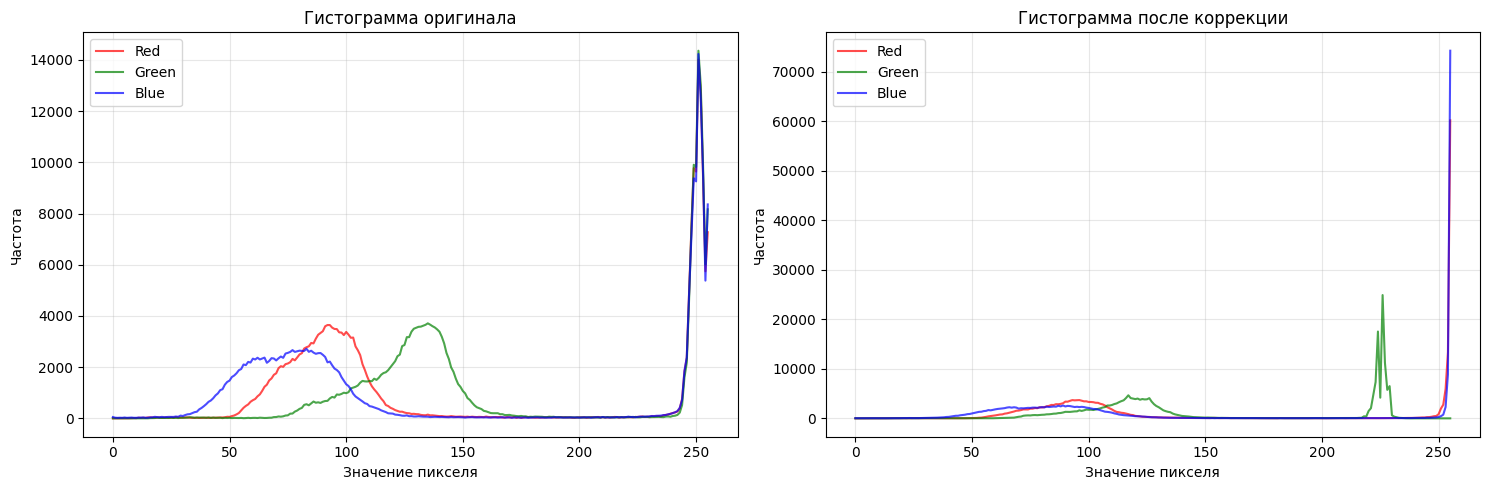

Сравнение гистограмм сохранено как: histogram_comparison.jpg


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Пути к исходным и выходным данным
input_paths = {
    "1": "/content/drive/MyDrive/Gray_world",
}

output_base = "/content/drive/MyDrive/Original Data/train_corrected2"
os.makedirs(output_base, exist_ok=True)

# Улучшенная функция коррекции "Серый мир"
def gray_world_corrected(image):
    """
    Коррекция баланса белого по алгоритму 'Серый мир'
    """
    # Проверяем, что изображение цветное
    if len(image.shape) != 3 or image.shape[2] != 3:
        print("Изображение не цветное, пропускаем...")
        return image

    # Конвертируем BGR в RGB для корректной работы
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)

    # Вычисляем средние значения для каждого канала
    mean_r = np.mean(image_rgb[:, :, 0])
    mean_g = np.mean(image_rgb[:, :, 1])
    mean_b = np.mean(image_rgb[:, :, 2])

    # Среднее серое значение
    mean_gray = (mean_r + mean_g + mean_b) / 3.0

    # Избегаем деления на ноль
    if mean_r < 1e-6 or mean_g < 1e-6 or mean_b < 1e-6:
        print("Обнаружены нулевые средние значения, пропускаем коррекцию")
        return image

    # Коэффициенты коррекции
    scale_r = mean_gray / mean_r
    scale_g = mean_gray / mean_g
    scale_b = mean_gray / mean_b

    # Применяем коррекцию
    corrected = image_rgb.copy()
    corrected[:, :, 0] = corrected[:, :, 0] * scale_r  # Красный канал
    corrected[:, :, 1] = corrected[:, :, 1] * scale_g  # Зеленый канал
    corrected[:, :, 2] = corrected[:, :, 2] * scale_b  # Синий канал

    # Ограничиваем значения и конвертируем обратно
    corrected = np.clip(corrected, 0, 255).astype(np.uint8)
    corrected_bgr = cv2.cvtColor(corrected, cv2.COLOR_RGB2BGR)

    return corrected_bgr

# Функция для проверки результата коррекции
def check_correction(original, corrected, filename=""):
    """
    Проверяет эффективность коррекции
    """
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    corrected_rgb = cv2.cvtColor(corrected, cv2.COLOR_BGR2RGB)

    # Средние значения до коррекции
    mean_r_orig = np.mean(original_rgb[:, :, 0])
    mean_g_orig = np.mean(original_rgb[:, :, 1])
    mean_b_orig = np.mean(original_rgb[:, :, 2])

    # Средние значения после коррекции
    mean_r_corr = np.mean(corrected_rgb[:, :, 0])
    mean_g_corr = np.mean(corrected_rgb[:, :, 1])
    mean_b_corr = np.mean(corrected_rgb[:, :, 2])

    print(f"{filename}:")
    print(f"  До: R={mean_r_orig:.1f}, G={mean_g_orig:.1f}, B={mean_b_orig:.1f}")
    print(f"  После: R={mean_r_corr:.1f}, G={mean_g_corr:.1f}, B={mean_b_corr:.1f}")

    # Разница между каналами (должна уменьшиться)
    diff_orig = max(abs(mean_r_orig - mean_g_orig),
                   abs(mean_r_orig - mean_b_orig),
                   abs(mean_g_orig - mean_b_orig))
    diff_corr = max(abs(mean_r_corr - mean_g_corr),
                   abs(mean_r_corr - mean_b_corr),
                   abs(mean_g_corr - mean_b_corr))

    print(f"  Макс. разница между каналами: {diff_orig:.1f} -> {diff_corr:.1f}")
    print()
    return diff_orig, diff_corr

# Функция для визуализации результатов
def visualize_results(original, corrected, filename):
    """
    Создает сравнительное изображение
    """
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    corrected_rgb = cv2.cvtColor(corrected, cv2.COLOR_BGR2RGB)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Оригинальное изображение
    ax1.imshow(original_rgb)
    ax1.set_title('Оригинал')
    ax1.axis('off')

    # Скорректированное изображение
    ax2.imshow(corrected_rgb)
    ax2.set_title('Серый мир коррекция')
    ax2.axis('off')

    plt.tight_layout()
    plt.savefig(os.path.join(output_base, f"comparison_{filename}"), dpi=100, bbox_inches='tight')
    plt.close()

# Основная функция обработки
def process_images():
    # Счетчики для статистики
    processed_count = 0
    skipped_count = 0
    total_diff_reduction = 0

    for class_name, input_path in input_paths.items():
        output_path = os.path.join(output_base, f"{class_name}_corrected")
        os.makedirs(output_path, exist_ok=True)

        print(f"Обработка класса: {class_name}")
        print(f"Входная папка: {input_path}")
        print(f"Выходная папка: {output_path}")
        print("-" * 50)

        # Получаем список файлов
        image_files = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if not image_files:
            print("Не найдено изображений для обработки!")
            continue

        print(f"Найдено {len(image_files)} изображений")

        for filename in tqdm(image_files, desc=f"Обработка {class_name}"):
            img_path = os.path.join(input_path, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"Не удалось загрузить: {filename}")
                skipped_count += 1
                continue

            # Проверяем, что изображение цветное
            if len(img.shape) != 3 or img.shape[2] != 3:
                print(f"Пропущено (не цветное): {filename}")
                skipped_count += 1
                continue

            # Применяем коррекцию
            corrected_img = gray_world_corrected(img)

            # Проверяем результат
            if corrected_img is None or corrected_img.size == 0:
                print(f"Ошибка обработки: {filename}")
                skipped_count += 1
                continue

            # Сохраняем результат
            output_filepath = os.path.join(output_path, filename)
            success = cv2.imwrite(output_filepath, corrected_img)

            if success:
                processed_count += 1
                # Для первых 5 изображений показываем детальную информацию
                if processed_count <= 5:
                    diff_orig, diff_corr = check_correction(img, corrected_img, filename)
                    total_diff_reduction += (diff_orig - diff_corr)
            else:
                print(f"Ошибка сохранения: {filename}")
                skipped_count += 1

    print("\n" + "="*50)
    print("ОБРАБОТКА ЗАВЕРШЕНА")
    print(f"Успешно обработано: {processed_count} изображений")
    print(f"Пропущено: {skipped_count} изображений")
    if processed_count > 0:
        avg_reduction = total_diff_reduction / min(processed_count, 5)
        print(f"Среднее уменьшение разницы между каналами: {avg_reduction:.2f}")
    print(f"Результаты сохранены в: {output_base}")

    return processed_count > 0  # Возвращаем True если были обработаны изображения

# Дополнительная функция для тестирования на одном изображении
def test_single_image():
    """
    Тестирует коррекцию на одном изображении для отладки
    """
    test_class = "1"
    input_path = input_paths[test_class]

    # Находим первое изображение для теста
    image_files = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("Тестовые изображения не найдены!")
        return None, None, None

    test_filename = image_files[0]
    img_path = os.path.join(input_path, test_filename)
    img = cv2.imread(img_path)

    print("ТЕСТИРОВАНИЕ НА ОДНОМ ИЗОБРАЖЕНИИ")
    print(f"Тестовый файл: {test_filename}")
    print(f"Размер изображения: {img.shape}")
    print(f"Тип данных: {img.dtype}")

    # Применяем коррекцию
    corrected_img = gray_world_corrected(img)

    # Детальная проверка
    check_correction(img, corrected_img, "ТЕСТ")

    # Визуализация
    visualize_results(img, corrected_img, "test_comparison.jpg")
    print("Сравнительное изображение сохранено как: test_comparison.jpg")

    return img, corrected_img, test_filename

# Функция для анализа гистограмм (ТОЛЬКО ПОСЛЕ ОБРАБОТКИ)
def analyze_histograms():
    """
    Сравнивает гистограммы до и после коррекции
    """
    test_class = "1"
    input_path = input_paths[test_class]
    output_path = os.path.join(output_base, f"{test_class}_corrected")

    # Проверяем, существует ли выходная папка и есть ли в ней файлы
    if not os.path.exists(output_path):
        print("Выходная папка не существует! Сначала запустите обработку.")
        return

    image_files = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("Изображения не найдены!")
        return

    filename = image_files[0]
    original_path = os.path.join(input_path, filename)
    corrected_path = os.path.join(output_path, filename)

    # Проверяем, что файлы существуют
    if not os.path.exists(corrected_path):
        print(f"Скорректированный файл не найден: {corrected_path}")
        print("Сначала запустите обработку изображений.")
        return

    original_img = cv2.imread(original_path)
    corrected_img = cv2.imread(corrected_path)

    # Проверяем, что изображения загружены корректно
    if original_img is None:
        print(f"Не удалось загрузить оригинальное изображение: {original_path}")
        return

    if corrected_img is None:
        print(f"Не удалось загрузить скорректированное изображение: {corrected_path}")
        return

    # Конвертируем в RGB для анализа
    original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    corrected_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)

    # Строим гистограммы
    plt.figure(figsize=(15, 5))

    # Гистограмма оригинального изображения
    plt.subplot(1, 2, 1)
    colors = ['r', 'g', 'b']
    channel_names = ['Red', 'Green', 'Blue']
    for i, (color, name) in enumerate(zip(colors, channel_names)):
        hist = cv2.calcHist([original_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=color, label=name, alpha=0.7)
    plt.title('Гистограмма оригинала')
    plt.xlabel('Значение пикселя')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Гистограмма скорректированного изображения
    plt.subplot(1, 2, 2)
    for i, (color, name) in enumerate(zip(colors, channel_names)):
        hist = cv2.calcHist([corrected_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=color, label=name, alpha=0.7)
    plt.title('Гистограмма после коррекции')
    plt.xlabel('Значение пикселя')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(os.path.join(output_base, 'histogram_comparison.jpg'), dpi=100, bbox_inches='tight')
    plt.show()
    print("Сравнение гистограмм сохранено как: histogram_comparison.jpg")

# Запуск программы
if __name__ == "__main__":
    print("ЗАПУСК КОРРЕКЦИИ БАЛАНСА БЕЛОГО 'СЕРЫЙ МИР'")
    print("="*60)

    # Сначала тестируем на одном изображении
    original, corrected, test_filename = test_single_image()

    print("\n" + "="*60)
    print("НАЧИНАЕМ ОБРАБОТКУ ВСЕХ ИЗОБРАЖЕНИЙ")
    print("="*60)

    # Затем обрабатываем все изображения
    processing_successful = process_images()

    # Анализ гистограмм только если обработка прошла успешно
    if processing_successful:
        print("\n" + "="*60)
        print("АНАЛИЗ РЕЗУЛЬТАТОВ")
        print("="*60)
        analyze_histograms()
    else:
        print("\nНевозможно выполнить анализ: изображения не были обработаны")